<a href="https://colab.research.google.com/github/SeounghwanPark/nesaram/blob/main/MainQuest05_r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 라이브러리 및 데이터 불러오기**

In [1]:
# 기본 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Google Drive 마운트 (Colab 사용)
from google.colab import drive
drive.mount('/content/drive/')

# Pandas 옵션 설정 (모든 컬럼 출력)
pd.set_option('display.max_columns', None)

Mounted at /content/drive/


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124947 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


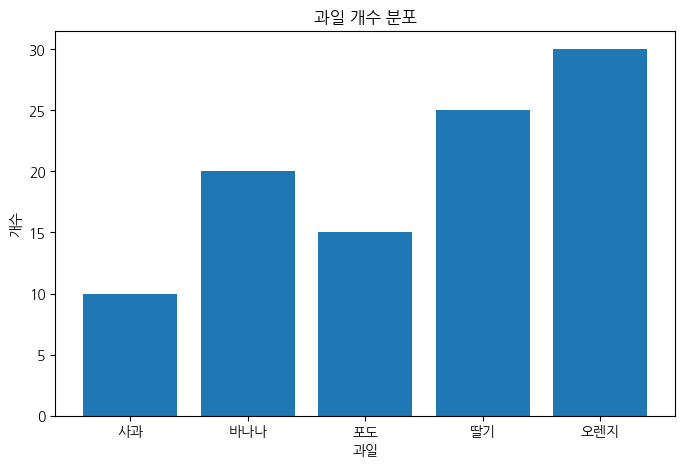

In [12]:
# 1. 한글 폰트 설치 (Google Colab 전용)
!apt-get update -qq
!apt-get install -qq -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 2. matplotlib에서 한글 폰트 설정
def set_korean_font():
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # 폰트 경로 설정
    if os.path.exists(font_path):
        fm.fontManager.addfont(font_path)  # 폰트 매니저에 추가
        plt.rc('font', family='NanumGothic')  # 기본 폰트 설정
    else:
        print("한글 폰트 경로를 찾을 수 없습니다.")

# 3. 폰트 적용 및 캐시 리셋 (중요)
set_korean_font()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
fm._load_fontmanager(try_read_cache=False)  # 폰트 매니저 캐시 리셋

# 4. 한글 폰트 적용 확인을 위한 테스트 그래프
labels = ['사과', '바나나', '포도', '딸기', '오렌지']
values = [10, 20, 15, 25, 30]

plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel("과일")
plt.ylabel("개수")
plt.title("과일 개수 분포")
plt.show()

**데이터 로딩**

In [3]:
# 데이터 로드 (파일 경로)
aisles_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/aisles.csv')
departments_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/departments.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/orders.csv')
order_products_prior_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/order_products__prior.csv')
order_products_train_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/order_products__train.csv')
products_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/products.csv')


# 모든 컬럼이 출력
pd.set_option('display.max_columns', None)

dataframes = {
    "aisles_df": aisles_df,
    "departments_df": departments_df,
    "orders_df": orders_df,
    "order_products_prior_df": order_products_prior_df,
    "order_products_train_df": order_products_train_df,
    "products_df": products_df
}

for name, df in dataframes.items():
    print("=" * 50)
    print(f"{name}")  # 데이터프레임 이름 출력
    print("=" * 50)

    # 데이터프레임 정보 출력
    info_df = pd.DataFrame({
        "Columns": df.columns,
        "Non-Null Count": [df[col].count() for col in df.columns],
        "Dtype": [df[col].dtype for col in df.columns]
    })
    print("\n데이터셋 정보")
    display(info_df)  # 테이블 형태로 출력

    # 데이터프레임 전체 출력
    print(f"\n{name} 데이터셋 (총 {df.shape[0]} 행 × {df.shape[1]} 열)")
    display(df)  # 테이블 형태로 출력


aisles_df

데이터셋 정보


Columns  Non-Null Count   Dtype
0  aisle_id             134   int64
1     aisle             134  object


aisles_df 데이터셋 (총 134 행 × 2 열)


aisle_id                       aisle
0           1       prepared soups salads
1           2           specialty cheeses
2           3         energy granola bars
3           4               instant foods
4           5  marinades meat preparation
..        ...                         ...
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

[134 rows x 2 columns]

departments_df

데이터셋 정보


Columns  Non-Null Count   Dtype
0  department_id              21   int64
1     department              21  object


departments_df 데이터셋 (총 21 행 × 2 열)


department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

orders_df

데이터셋 정보


Columns  Non-Null Count    Dtype
0                order_id         3421083    int64
1                 user_id         3421083    int64
2                eval_set         3421083   object
3            order_number         3421083    int64
4               order_dow         3421083    int64
5       order_hour_of_day         3421083    int64
6  days_since_prior_order         3214874  float64


orders_df 데이터셋 (총 3421083 행 × 7 열)


order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  
0                        8                     NaN  
1                        7                    15.0  
2                       12                    21.0  
3                        7                    29.0  
4                       15                    28.0  
...                    ...                     ...  
3421078                 18                    29.0  
3421079                 10                    30.0  
3421080                 12                    18.0  
3421081                 12                     7.0  
3421082                 14                    30.0  

[3421083 rows x 7 columns]

order_products_prior_df

데이터셋 정보


Columns  Non-Null Count  Dtype
0           order_id        32434489  int64
1         product_id        32434489  int64
2  add_to_cart_order        32434489  int64
3          reordered        32434489  int64


order_products_prior_df 데이터셋 (총 32434489 행 × 4 열)


order_id  product_id  add_to_cart_order  reordered
0                2       33120                  1          1
1                2       28985                  2          1
2                2        9327                  3          0
3                2       45918                  4          1
4                2       30035                  5          0
...            ...         ...                ...        ...
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1

[32434489 rows x 4 columns]

order_products_train_df

데이터셋 정보


Columns  Non-Null Count  Dtype
0           order_id         1384617  int64
1         product_id         1384617  int64
2  add_to_cart_order         1384617  int64
3          reordered         1384617  int64


order_products_train_df 데이터셋 (총 1384617 행 × 4 열)


order_id  product_id  add_to_cart_order  reordered
0               1       49302                  1          1
1               1       11109                  2          1
2               1       10246                  3          0
3               1       49683                  4          0
4               1       43633                  5          1
...           ...         ...                ...        ...
1384612   3421063       14233                  3          1
1384613   3421063       35548                  4          1
1384614   3421070       35951                  1          1
1384615   3421070       16953                  2          1
1384616   3421070        4724                  3          1

[1384617 rows x 4 columns]

products_df

데이터셋 정보


Columns  Non-Null Count   Dtype
0     product_id           49688   int64
1   product_name           49688  object
2       aisle_id           49688   int64
3  department_id           49688   int64


products_df 데이터셋 (총 49688 행 × 4 열)


product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id  
0            61             19  
1           104             13  
2            94              7  
3            38              1  
4             5             13  
...         ...            ...  
49683       124              5  
49684        42              1  
49685       112              3  
49686        41              8  
49687        73             11  

[49688 rows x 4 columns]

**2. 데이터셋별 기초 EDA**

In [ ]:
import pandas as pd

# 1. prior 주문 데이터만 사용 (주문 내역)
prior_orders = orders_df[orders_df['eval_set'] == 'prior'].copy()

# 2. orders와 order_products_prior를 결합하여 각 주문의 상품 정보를 추가
prior_orders_products = pd.merge(prior_orders, order_products_prior_df, on='order_id', how='inner')

# 3. 고객별 주요 지표 집계
# - total_orders: 고객의 최대 order_number (고객의 주문 횟수)
# - total_items: 고객이 주문한 전체 상품 수 (행 개수)
# - total_reorders: 고객이 재구매한 상품의 총 개수
# - avg_days_between: 고객별 평균 주문 간격 (NaN은 자동 제외)
customer_segmentation = prior_orders_products.groupby('user_id').agg(
    total_orders = ('order_number', 'max'),
    total_items = ('product_id', 'count'),
    total_reorders = ('reordered', 'sum'),
    avg_days_between = ('days_since_prior_order', 'mean')
).reset_index()

# 4. 추가 지표 생성
# - avg_items_per_order: 주문당 평균 구매 상품 수
# - reorder_rate: 전체 구매 상품 중 재구매 상품의 비율
customer_segmentation['avg_items_per_order'] = customer_segmentation['total_items'] / customer_segmentation['total_orders']
customer_segmentation['reorder_rate'] = customer_segmentation['total_reorders'] / customer_segmentation['total_items']

# 결과 확인
print("고객 세그먼트 데이터셋 미리보기")
display(customer_segmentation.head())

고객 세그먼트 데이터셋 미리보기


user_id  total_orders  total_items  total_reorders  avg_days_between  \
0        1            10           59              41         20.259259   
1        2            14          195              93         15.967033   
2        3            12           88              55         11.487179   
3        4             5           18               1         15.357143   
4        5             4           37              14         14.500000   

   avg_items_per_order  reorder_rate  
0             5.900000      0.694915  
1            13.928571      0.476923  
2             7.333333      0.625000  
3             3.600000      0.055556  
4             9.250000      0.378378

# 추가 지표 생성

total_orders: 고객의 최대 order_number (고객의 주문 횟수)

total_items: 고객이 주문한 전체 상품 수 (행 개수)

total_reorders: 고객이 재구매한 상품의 총 개수

avg_days_between: 고객별 평균 주문 간격 (NaN은 자동 제외)

avg_items_per_order: 주문당 평균 구매 상품 수

reorder_rate: 전체 구매 상품 중 재구매 상품의 비율

Summary Statistics (Max, Mean, Std):


max           mean           std
user_id              206209.000000  103105.000000  59527.555167
total_orders             99.000000      15.590367     16.654774
total_items            3725.000000     157.289396    204.208233
total_reorders         3275.000000      92.753158    158.400413
avg_days_between         29.693069      12.877184      5.656177
avg_items_per_order      70.250000       9.951586      5.863570
reorder_rate              0.989529       0.432249      0.212144

Missing Values per column:
user_id                0
total_orders           0
total_items            0
total_reorders         0
avg_days_between       0
avg_items_per_order    0
reorder_rate           0
dtype: int64


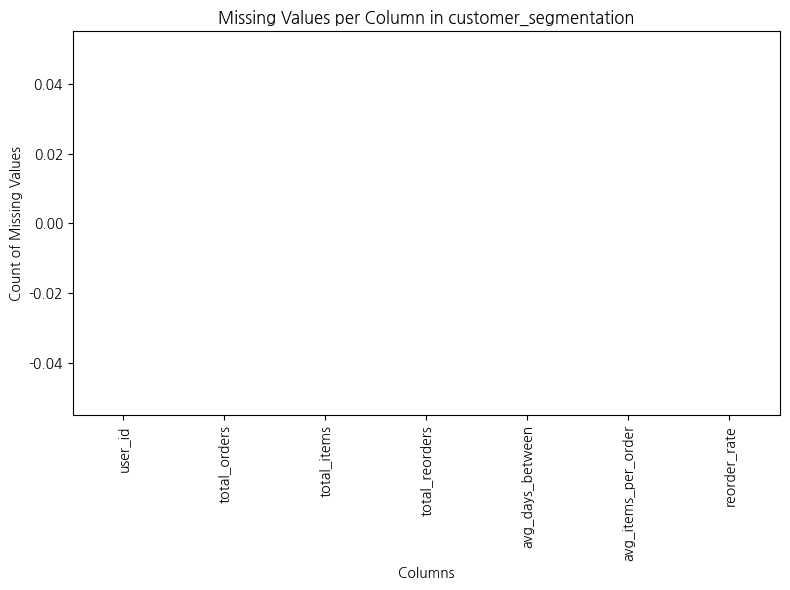

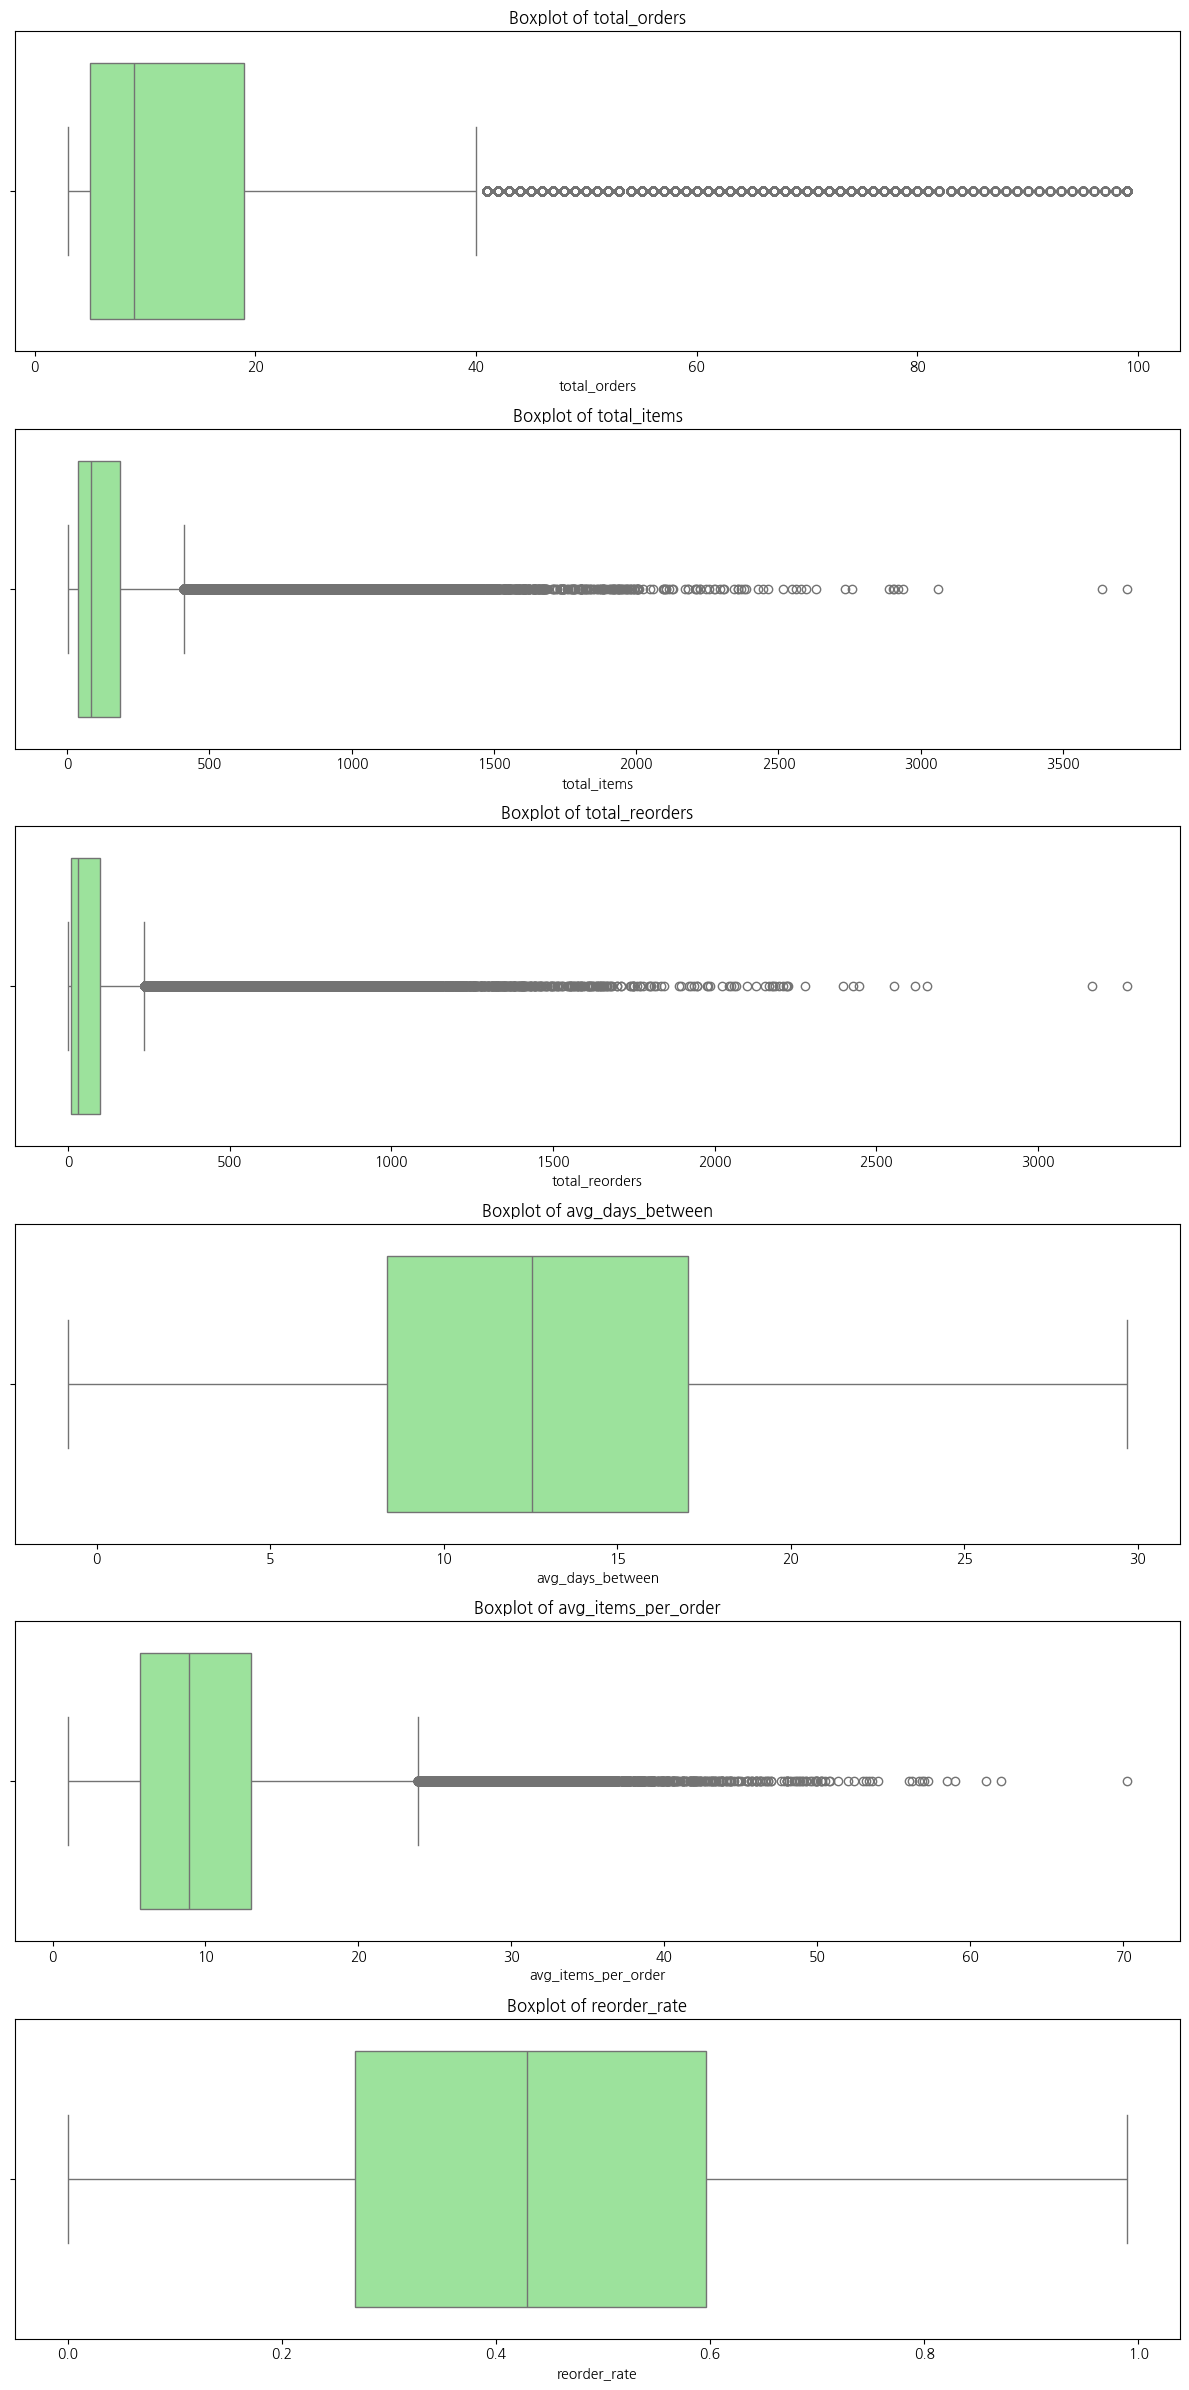

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary Statistics: 최대값, 평균, 표준편차 계산 및 출력
summary_stats = customer_segmentation.describe().T[['max', 'mean', 'std']]
print("Summary Statistics (Max, Mean, Std):")
display(summary_stats)

# 2. 결측치(Missing Values) 시각화
# 각 컬럼별 결측치 개수 계산
missing_values = customer_segmentation.isnull().sum()
print("Missing Values per column:")
print(missing_values)

plt.figure(figsize=(8, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values per Column in customer_segmentation")
plt.tight_layout()
plt.show()

# 3. 이상치(Outlier) 시각화: 각 숫자형 피처에 대해 Boxplot 생성
# 분석 시 user_id는 식별자이므로 제외하고, 나머지 숫자형 변수에 대해 박스플롯 작성
numeric_cols = customer_segmentation.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'user_id' in numeric_cols:
    numeric_cols.remove('user_id')

plt.figure(figsize=(12, len(numeric_cols) * 4))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, idx)
    sns.boxplot(x=customer_segmentation[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 결측치 검토 결과
# Boxplot of total_orders : 주문횟수

대부분의 고객은 5~20회을 기록, 극소수의 고객이 매우 많은 주문 횟수(오른쪽 꼬리가 긴 형태(우측 편향)

박스 밖(상한선 위)에 위치한 점 '주문 횟수가 매우 많은’고객들(또는 이상치)이다.

# Boxplot of total_items : 구매한 전체 상품 수
대부분의 고객은 적은 수의 상품을 구매하지만, 극소수 고객은 수백~수천 개의 상품을 구매해 큰 편차가 발생

우측으로 긴 꼬리를 가지며, 박스 바깥 점들이 구매량이 매우 높은 고객(이상치)

# Boxplot of total_reorders : 재구매한 총횟수

일부 고객은 재구매 횟수가 매우 많아 우측 꼬리가 길게 형성

재구매 횟수가 0에 가까운 고객(거의 재구매를 안 하는 고객)도 있을 수 있으며, 재구매를 많이 하는 고객은 박스 상단을 훌쩍 넘는 점(이상치)

# Boxplot of avg_days_between : 첫구매후 주문간 평균일수
대체로 2주정도가 가장 많다(1~2회/주)

최대 30일 이상 주문고객 존재
# Boxplot of avg_items_per_order

한 번 주문당 평균적으로 구매하는 상품 개수

보통 5~10개 정도이며 한번에 많은상품 25 ~70까지 존재

# Boxplot of reorder_rate

전체 상품중 재구매가 차지하는 비율

보통 0.3~0.6이며 1근처까지 올라가는 극단적인 재구매 비율 고객 소수 존재(이상치)

엘보우기법 :  k=3 또는 k=4가 비교적 적절한 클러스터 수로 판단

KMeans 결과 산점도 (총 주문 수 vs. 평균 주문 간격)

(보라) 총주문수 30회 이하가 많고, 평균주문일 10일이상이 많다. ▶신규고객, 이탈위험고객 가능

(청녹색) 총주문수 15일 이하가 많고, 평균주문일 15~30 분포 : ▶중간 충성도 고객

(노란색) 총주문수 40~100까지 많고, 평균주문일 10일 이하로 짧다: ▶핵심 충성도 고객

## 마케팅 전략
**‘충성 고객**’

추가 혜택(할인, 쿠폰)으로 재구매를 유도하거나 VIP 프로그램을 운영.

‘**저빈도 고객**’이나 **‘이탈 위험 고객’**

리마인드 알림이나 신규 추천 상품을 제공하여 주문 빈도를 늘리는 방안을 고려.

**상품 추천:**

각 군집별로 자주 구매하는 상품 카테고리를 분석해, 맞춤형 상품 추천을 진행.

**재고/물류 관리:**

주문 간격이 짧은 군집은 특정 시점에 수요가 집중될 가능성이 있으므로, 그에 맞춰 재고 관리나 물류 배치를 최적화할 수 있습니다.

# 클러스터 특징
왼쪽 상단(주문 수 적고, 주문 간격이 길거나 중간 수준)

왼쪽 하단(주문 수 적고, 주문 간격이 짧은 편)

중간 영역(주문 수와 주문 간격이 모두 중간 정도)

오른쪽 하단(주문 수 많고, 주문 간격이 짧음)

**마케팅 전략**

* (오른쪽 하단) 충성 고객:

  VIP 프로그램, 추가 적립, 개인화 추천 등을 통해 유지 및 매출 극대화.

* (왼쪽 상단/하단) 저빈도·신규 고객:

  할인 쿠폰, 알림(푸시) 메시지, 개인화 추천으로 주문 빈도 상승 유도.

**상품 추천/프로모션**
* 각 클러스터별로 자주 구매하는 상품 카테고리를 분석하면, 클러스터 맞춤형 상품 추천이나 프로모션을 기획

**운영/재고 관리**
* **주문 간격이 짧고 주문 횟수가 많은 고객 클러스터**에서 특정 시기에 수요가 집중될 수 있으므로, 재고·물류를 효율적으로 운영해야됨.

##avg_items_per_order와 reorder_rate
사용 클러스터 검토


각 클러스터별 고객 수:
cluster
1    61590
2    56810
3    49027
0    38782
Name: count, dtype: int64


user_id  total_orders  total_items  total_reorders  avg_days_between  \
0        1            10           59              41         18.457627   
1        2            14          195              93         14.835897   
2        3            12           88              55         10.068182   
3        4             5           18               1         11.722222   
4        5             4           37              14          9.891892   

   avg_items_per_order  reorder_rate  cluster  
0             5.900000      0.694915        3  
1            13.928571      0.476923        0  
2             7.333333      0.625000        3  
3             3.600000      0.055556        2  
4             9.250000      0.378378        1

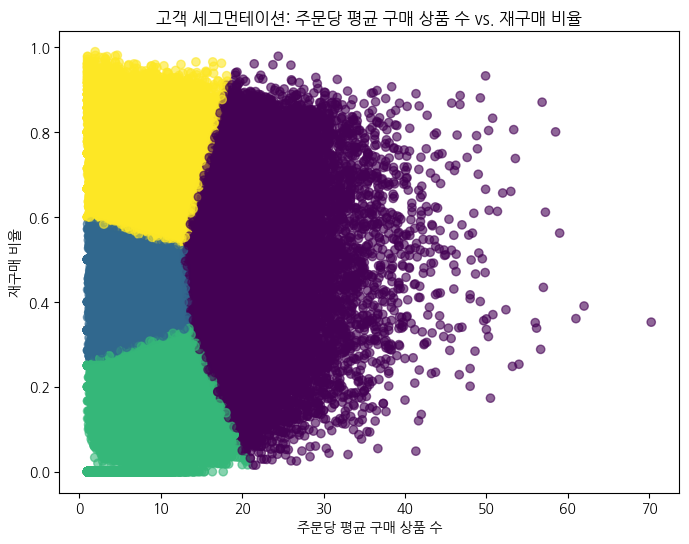

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 클러스터링에 사용할 피처 선정 (avg_items_per_order, reorder_rate)
features = ['avg_items_per_order', 'reorder_rate']
X = customer_segmentation[features]

# 2. 피처 스케일링 (StandardScaler)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans 적용 (클러스터 수 = 4)
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_segmentation['cluster'] = kmeans.fit_predict(X_scaled)

# 4. 클러스터링 결과 확인
print("각 클러스터별 고객 수:")
print(customer_segmentation['cluster'].value_counts())
display(customer_segmentation.head())

# 5. 클러스터링 결과 시각화 (avg_items_per_order vs. reorder_rate)
plt.figure(figsize=(8, 6))
plt.scatter(
    customer_segmentation['avg_items_per_order'],
    customer_segmentation['reorder_rate'],
    c=customer_segmentation['cluster'],
    cmap='viridis',
    alpha=0.6
)
plt.xlabel('주문당 평균 구매 상품 수')
plt.ylabel('재구매 비율')
plt.title('고객 세그먼테이션: 주문당 평균 구매 상품 수 vs. 재구매 비율')
plt.show()

x축: avg_items_per_order : 한 번의 주문에 평균적으로 구매하는 상품 수.

y축: reorder_rate : 전체 구매 상품 중 재구매(이미 샀던 상품을 다시 구매) 비율. 0에 가까울수록 ‘새로운 상품’

저(低) 아이템 수, 저(低) 재구매 비율


##베이지안 최적화 결과 최적 클러스터 수

In [4]:
pip install scikit-optimize #설치  scikit-optimize (skopt) 라이브러리

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.0 MB/s eta 0:00:00


베이지안 최적화 결과 최적 클러스터 수: 3
해당 k에서의 silhouette_score: 0.5503


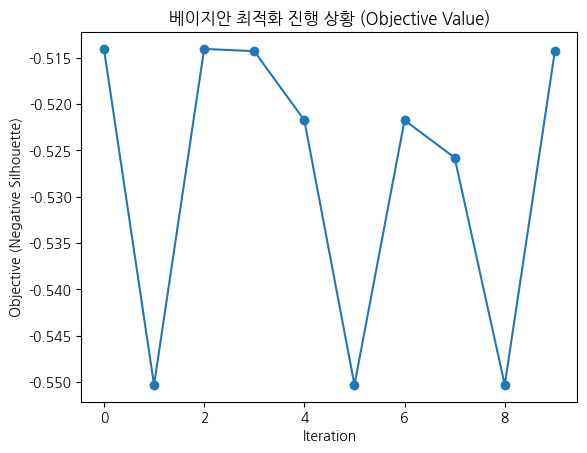


[전체 데이터에 대해 best_k 적용한 결과 예시]
cluster_opt
2    97810
1    82977
0    25422
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# KMeans, 평가 지표(silhouette_score) import
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# scikit-optimize 라이브러리
from skopt import gp_minimize
from skopt.space import Integer
from skopt.utils import use_named_args

# --------------------------------------------------
# 0. (예시) 고객 세그먼트용 피처 선택
# --------------------------------------------------
# 예: avg_items_per_order, reorder_rate 만 사용
features = ['avg_items_per_order', 'reorder_rate']
X = customer_segmentation[features]

# --------------------------------------------------
# 1. 20% 데이터 무작위 추출 (초기 실험용)
# --------------------------------------------------
# random_state를 고정하면 재현 가능
X_sample = X.sample(frac=0.2, random_state=42)

# --------------------------------------------------
# 2. 베이지안 최적화(Bayesian Optimization)로
#    최적의 클러스터 수(k) 탐색
# --------------------------------------------------
# 탐색 범위: k=2 ~ k=10
search_space = [
    Integer(low=2, high=10, name='n_clusters')
]

@use_named_args(search_space)
def objective(n_clusters):
    """
    베이지안 최적화에서 평가할 목적함수.
    silhouette_score를 최대화하고자 하므로,
    gp_minimize에서는 '값이 낮을수록 좋다'고 판단하므로
    -1 * score(negative) 형태로 반환.
    """
    # KMeans 모델 생성 및 학습
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_sample)

    # 실루엣 점수 계산
    score = silhouette_score(X_sample, labels)

    # gp_minimize는 '값이 낮을수록 좋은' 함수를 최소화
    # 실루엣 점수는 높을수록 좋으므로 부호를 바꿔서 반환
    return -score

# --------------------------------------------------
# 3. gp_minimize로 베이지안 최적화 실행
#    (n_calls=10: 최대 10회 반복)
# --------------------------------------------------
res = gp_minimize(
    func=objective,          # 목적함수
    dimensions=search_space, # 탐색 범위
    n_calls=10,              # 반복 횟수
    random_state=42
)

# --------------------------------------------------
# 4. 결과 확인
# --------------------------------------------------
best_k = res.x[0]
best_score = -res.fun  # 부호를 바꿔서 계산
print(f"베이지안 최적화 결과 최적 클러스터 수: {best_k}")
print(f"해당 k에서의 silhouette_score: {best_score:.4f}")

# 추가: 최적화 과정 시각화 (선택 사항)
# res.func_vals에는 각 반복에서의 objective 함수 값(음수화된 silhouette)이 저장됨
plt.plot(res.func_vals, marker='o')
plt.title("베이지안 최적화 진행 상황 (Objective Value)")
plt.xlabel("Iteration")
plt.ylabel("Objective (Negative Silhouette)")
plt.show()

# --------------------------------------------------
# 5. 최적 k로 전체 데이터에 KMeans 적용 (선택 사항)
# --------------------------------------------------
kmeans_optimal = KMeans(n_clusters=best_k, random_state=42)
customer_segmentation['cluster_opt'] = kmeans_optimal.fit_predict(X)

print("\n[전체 데이터에 대해 best_k 적용한 결과 예시]")
print(customer_segmentation['cluster_opt'].value_counts())

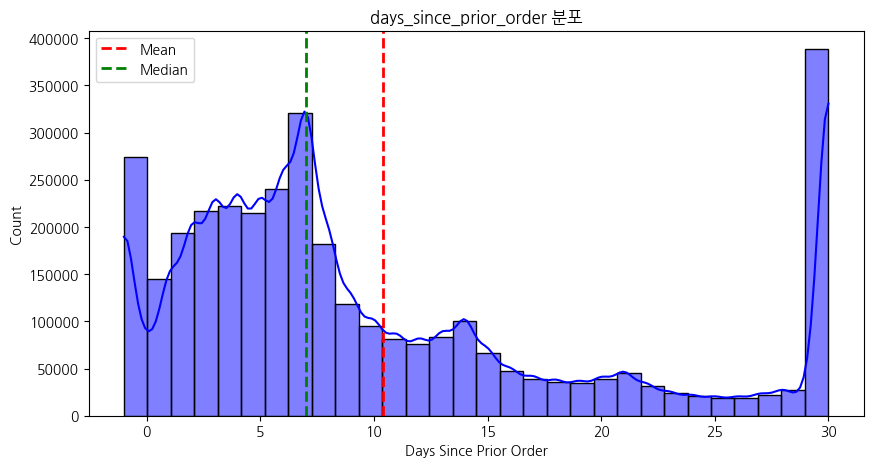

In [ ]:
# 데이터 분포 분석

plt.figure(figsize=(10, 5))
sns.histplot(orders_df["days_since_prior_order"].dropna(), bins=30, kde=True, color='blue')
plt.axvline(orders_df["days_since_prior_order"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(orders_df["days_since_prior_order"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("days_since_prior_order 분포")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Count")
plt.legend()
plt.show()

<ipython-input-17-2e76870fa94a>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_group_counts.index, y=day_group_counts.values, palette="viridis")


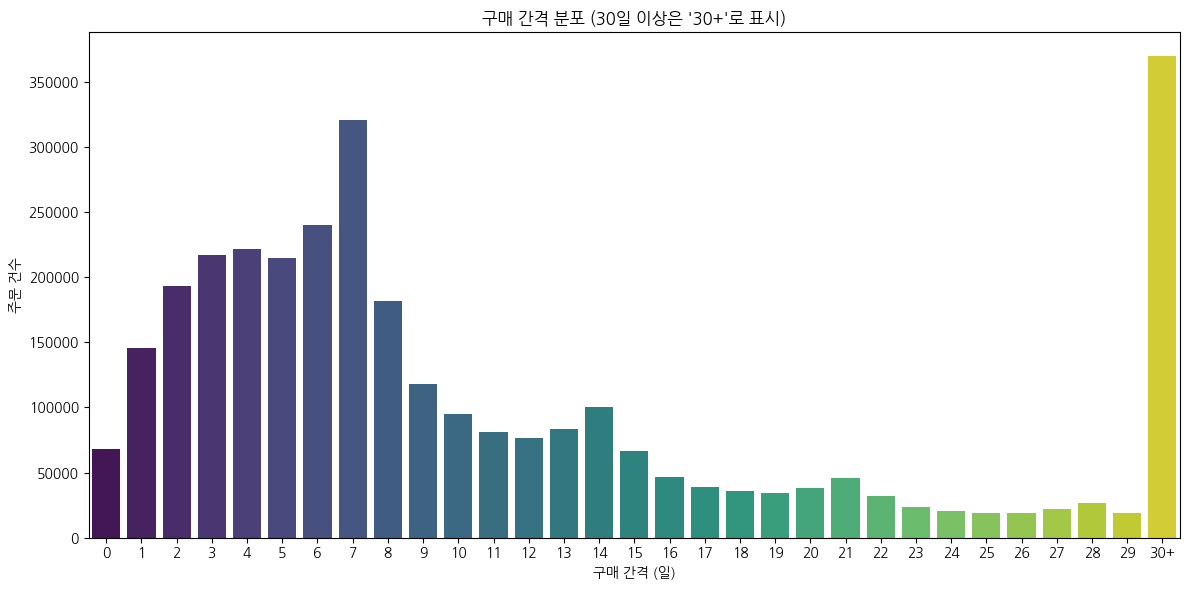

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# orders_df 데이터셋에서 결측치(첫 주문)를 제외한 후 복사
df = orders_df.dropna(subset=["days_since_prior_order"]).copy()

# 구매 간격이 30일 이상인 경우는 실제 30일 이상의 주문을 모두 "30+" 그룹으로 표시
df["day_group"] = df["days_since_prior_order"].apply(lambda x: str(int(x)) if x < 30 else "30+")

# 각 그룹별 주문 건수 집계
day_group_counts = df["day_group"].value_counts()

# x축을 숫자 순서대로 정렬 (예: "1", "2", ..., "29", "30+")
sorted_index = sorted(day_group_counts.index, key=lambda x: int(x.replace("+","")))
day_group_counts = day_group_counts.loc[sorted_index]

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=day_group_counts.index, y=day_group_counts.values, palette="viridis")
plt.xlabel("구매 간격 (일)")
plt.ylabel("주문 건수")
plt.title("구매 간격 분포 (30일 이상은 '30+'로 표시)")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# days_since_prior_order 값이 30인 주문 건수를 계산
count_30_orders = (orders_df["days_since_prior_order"] == 30).sum()
print("days_since_prior_order가 30일이상 간격 주문 건수:", count_30_orders)

days_since_prior_order가 30일이상 간격 주문 건수: 369323


In [ ]:
import pandas as pd

max_value = orders_df["days_since_prior_order"].max()
print("days_since_prior_order 컬럼의 최대값:", max_value)

# 최소값, 평균값, 표준편차 계산
min_value = orders_df["days_since_prior_order"].min()
mean_value = orders_df["days_since_prior_order"].mean()
std_value = orders_df["days_since_prior_order"].std()

print("최소값:", min_value)
print("평균값:", mean_value)
print("표준편차:", std_value)

days_since_prior_order 컬럼의 최대값: 30.0
최소값: 0.0
평균값: 11.114836226863012
표준편차: 9.206736517484867


대부분이 7일 이내에 집중된 많은사용자가 매주 반복주문 경향

평균선이 중앙값보다 오른쪽에 위치 오른쪽 꼬리가 긴분포(대부분 7일이내 주문)

30일이상 구매자에 대한 마케팅 전략필요(350만명)

In [ ]:
import pandas as pd
import numpy as np

# 모든 컬럼 이름의 좌우 공백 제거 및 소문자로 변환
orders_df.columns = orders_df.columns.str.strip().str.lower()

# 컬럼 이름 확인 (출력하여 실제 컬럼명이 무엇인지 확인)
print("컬럼 이름:", orders_df.columns.tolist())

# '30over' 컬럼 생성: days_since_prior_order가 30이면 user_id 값을, 그렇지 않으면 NaN을 할당
orders_df['30over'] = np.where(orders_df['days_since_prior_order'] == 30,
                               orders_df['user_id'],
                               np.nan)

# 결과 확인: order_id, user_id, days_since_prior_order, 30over 컬럼 일부 미리보기
print(orders_df[['order_id', 'user_id', 'days_since_prior_order', '30over']].head(20))

컬럼 이름: ['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
    order_id  user_id  days_since_prior_order  30over
0    2539329        1                     NaN     NaN
1    2398795        1                    15.0     NaN
2     473747        1                    21.0     NaN
3    2254736        1                    29.0     NaN
4     431534        1                    28.0     NaN
5    3367565        1                    19.0     NaN
6     550135        1                    20.0     NaN
7    3108588        1                    14.0     NaN
8    2295261        1                     0.0     NaN
9    2550362        1                    30.0     1.0
10   1187899        1                    14.0     NaN
11   2168274        2                     NaN     NaN
12   1501582        2                    10.0     NaN
13   1901567        2                     3.0     NaN
14    738281        2                     8.0     NaN
15   1673511     

In [ ]:
import pandas as pd

# 각 컬럼별 결측치 개수 출력
missing_values = orders_df.isnull().sum()
print(missing_values)

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order     206209
30over                    3051760
dtype: int64


In [6]:
import pandas as pd

# 0. orders_df 수정: 결측치 -1로 대체 및 first_order 컬럼 추가
orders_df["days_since_prior_order"] = orders_df["days_since_prior_order"].fillna(-1)
orders_df["first_order"] = (orders_df["days_since_prior_order"] == -1).astype(int)

# 1. prior 주문 데이터만 사용 (주문 내역)
prior_orders = orders_df[orders_df['eval_set'] == 'prior'].copy()

# 2. orders와 order_products_prior를 결합하여 각 주문의 상품 정보를 추가
prior_orders_products = pd.merge(prior_orders, order_products_prior_df, on='order_id', how='inner')

# 3. 고객별 주요 지표 집계
# - total_orders: 고객의 최대 order_number (고객의 주문 횟수)
# - total_items: 고객이 주문한 전체 상품 수 (행 개수)
# - total_reorders: 고객이 재구매한 상품의 총 개수
# - avg_days_between: 고객별 평균 주문 간격 (NaN은 자동 제외)
customer_segmentation = prior_orders_products.groupby('user_id').agg(
    total_orders=('order_number', 'max'),
    total_items=('product_id', 'count'),
    total_reorders=('reordered', 'sum'),
    avg_days_between=('days_since_prior_order', 'mean')
).reset_index()

# 4. 추가 지표 생성
# - avg_items_per_order: 주문당 평균 구매 상품 수
# - reorder_rate: 전체 구매 상품 중 재구매 상품의 비율
customer_segmentation['avg_items_per_order'] = customer_segmentation['total_items'] / customer_segmentation['total_orders']
customer_segmentation['reorder_rate'] = customer_segmentation['total_reorders'] / customer_segmentation['total_items']

# 5. 고객별 집계 지표를 prior_orders_products 데이터에 매핑 방식으로 추가
#    (pd.merge 대신 각 행의 user_id로 매핑하여 메모리 사용량을 줄임)
agg_columns = ['total_orders', 'total_items', 'total_reorders',
               'avg_days_between', 'avg_items_per_order', 'reorder_rate']

# customer_segmentation을 user_id를 인덱스로 설정한 딕셔너리 형태로 생성
agg_dict = customer_segmentation.set_index('user_id')

# 각 agg_columns에 대해 prior_orders_products의 user_id로 매핑하여 컬럼 추가
for col in agg_columns:
    prior_orders_products[col] = prior_orders_products['user_id'].map(agg_dict[col])

# 최종 결과를 customer_segmentation_total에 저장
customer_segmentation_total = prior_orders_products

# 결과 확인
print("customer_segmentation_total 데이터셋 미리보기")
display(customer_segmentation_total.head())

customer_segmentation_total 데이터셋 미리보기


order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2539329        1    prior             1          2                  8   
2   2539329        1    prior             1          2                  8   
3   2539329        1    prior             1          2                  8   
4   2539329        1    prior             1          2                  8   

   days_since_prior_order  first_order  product_id  add_to_cart_order  \
0                    -1.0            1         196                  1   
1                    -1.0            1       14084                  2   
2                    -1.0            1       12427                  3   
3                    -1.0            1       26088                  4   
4                    -1.0            1       26405                  5   

   reordered  total_orders  total_items  total_reorders  avg_days_between  \
0          0            10           59              41         18.457627   
1          0            10           59              41         18.457627   
2          0            10           59              41         18.457627   
3          0            10           59              41         18.457627   
4          0            10           59              41         18.457627   

   avg_items_per_order  reorder_rate  
0                  5.9      0.694915  
1                  5.9      0.694915  
2                  5.9      0.694915  
3                  5.9      0.694915  
4                  5.9      0.694915

In [ ]:
# #CSV파일 저장 분석 데이터셋 만들기
# # customer_segmentation.csv로 저장
# customer_segmentation.to_csv("/content/drive/MyDrive/data/MQ05/customer_segmentation.csv", index=False)

# print("CSV 파일 저장이 완료되었습니다.")

CSV 파일 저장이 완료되었습니다.


In [ ]:
#CSV파일 저장 분석 데이터셋 만들기
# customer_segmentation_total.csv로 저장
customer_segmentation_total.to_csv("/content/drive/MyDrive/data/MQ05/customer_segmentation_total.csv", index=False)

print("CSV 파일 저장이 완료되었습니다.")

CSV 파일 저장이 완료되었습니다.


# 결측치 처리 방법
결측치 제거 : 첫 주문 일부 사용자의 정보 손실가능

평균값으로 대체 : 평균이 오른쪽으로 꼬리가 길어 평균이 비정상 확률높다

중앙값으로 대체 : 중앙값이 7일이라 대체값으로 가능성 있다.

**첫주문인 경우는 -1로 이전에 주문이 없다는 뜻으로 -1로 대체**

In [ ]:
# 결측치를 -1로 대체 하여 (이전 주문이 없다 = 첫 주문이라는 뜻)
orders_df["days_since_prior_order"] = orders_df["days_since_prior_order"].fillna(-1)

# 첫 주문 여부를 나타내는 새로운 컬럼 추가
orders_df["first_order"] = (orders_df["days_since_prior_order"] == -1).astype(int)
orders_df

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
1         2398795        1    prior             2          3   
2          473747        1    prior             3          3   
3         2254736        1    prior             4          4   
4          431534        1    prior             5          4   
...           ...      ...      ...           ...        ...   
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  first_order  
0                        8                    -1.0            1  
1                        7                    15.0            0  
2                       12                    21.0            0  
3                        7                    29.0            0  
4                       15                    28.0            0  
...                    ...                     ...          ...  
3421078                 18                    29.0            0  
3421079                 10                    30.0            0  
3421080                 12                    18.0            0  
3421081                 12                     7.0            0  
3421082                 14                    30.0            0  

[3421083 rows x 8 columns]

In [ ]:
# 결측치 확인
for name, df in dataframes.items():
    print(f"{name.upper()} 데이터셋 결측치 확인")
    print(df.isnull().sum(), "\n")

AISLES_DF 데이터셋 결측치 확인
aisle_id    0
aisle       0
dtype: int64 

DEPARTMENTS_DF 데이터셋 결측치 확인
department_id    0
department       0
dtype: int64 

ORDERS_DF 데이터셋 결측치 확인
order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
first_order               0
dtype: int64 

ORDER_PRODUCTS_PRIOR_DF 데이터셋 결측치 확인
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

ORDER_PRODUCTS_TRAIN_DF 데이터셋 결측치 확인
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64 

PRODUCTS_DF 데이터셋 결측치 확인
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64 



In [ ]:
# days_since_prior_order가 -1인 행 필터링
first_order_rows = orders_df.loc[orders_df["days_since_prior_order"] == -1]

# 필터링된 데이터 확인
print(first_order_rows)  # 전체 출력

# 만약 데이터 상위 10개만 출력
print(first_order_rows.head(10))

display(first_order_rows)

         order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
11        2168274        2    prior             1          2   
26        1374495        3    prior             1          1   
39        3343014        4    prior             1          6   
45        2717275        5    prior             1          3   
...           ...      ...      ...           ...        ...   
3420930    969311   206205    prior             1          4   
3420934   3189322   206206    prior             1          3   
3421002   2166133   206207    prior             1          6   
3421019   2227043   206208    prior             1          1   
3421069   3154581   206209    prior             1          3   

         order_hour_of_day  days_since_prior_order  first_order  
0                        8                    -1.0            1  
11                      11                    -1.0            1  
26                      14       

order_id  user_id eval_set  order_number  order_dow  \
0         2539329        1    prior             1          2   
11        2168274        2    prior             1          2   
26        1374495        3    prior             1          1   
39        3343014        4    prior             1          6   
45        2717275        5    prior             1          3   
...           ...      ...      ...           ...        ...   
3420930    969311   206205    prior             1          4   
3420934   3189322   206206    prior             1          3   
3421002   2166133   206207    prior             1          6   
3421019   2227043   206208    prior             1          1   
3421069   3154581   206209    prior             1          3   

         order_hour_of_day  days_since_prior_order  first_order  
0                        8                    -1.0            1  
11                      11                    -1.0            1  
26                      14                    -1.0            1  
39                      11                    -1.0            1  
45                      12                    -1.0            1  
...                    ...                     ...          ...  
3420930                 12                    -1.0            1  
3420934                 18                    -1.0            1  
3421002                 19                    -1.0            1  
3421019                 15                    -1.0            1  
3421069                 11                    -1.0            1  

[206209 rows x 8 columns]

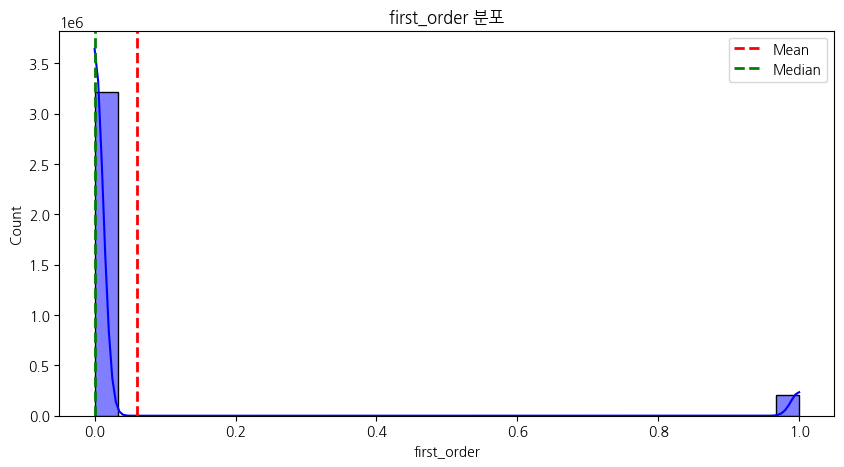

In [ ]:
# first_order 데이터 분포 분석

plt.figure(figsize=(10, 5))
sns.histplot(orders_df["first_order"].dropna(), bins=30, kde=True, color='blue')
plt.axvline(orders_df["first_order"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(orders_df["first_order"].median(), color='green', linestyle='dashed', linewidth=2, label="Median")
plt.title("first_order 분포")
plt.xlabel("first_order")
plt.ylabel("Count")
plt.legend()
plt.show()

In [ ]:
orders_df["first_order"].unique()

array([1, 0])

In [ ]:
# first_order 값 비율 계산 (퍼센트 단위)
first_order_ratio = orders_df["first_order"].value_counts(normalize=True) * 100

# 비율 출력
print("first_order 값 비율:")
print(first_order_ratio)

first_order 값 비율:
first_order
0    93.972406
1     6.027594
Name: proportion, dtype: float64


In [ ]:
# A와 B의 'C' 컬럼이 인덱스와 순서까지 완전히 동일하면 True를 반환합니다.
if orders_df["order_id"].equals(order_products_prior_df["order_id"]):
    print("두 테이블의 'order_id' 컬럼은 요소 단위로 동일합니다.")
else:
    print("두 테이블의 'order_id' 컬럼은 요소 단위로 동일하지 않습니다.")


두 테이블의 'order_id' 컬럼은 요소 단위로 동일하지 않습니다.


In [ ]:
# A와 B의 'C' 컬럼이 인덱스와 순서까지 완전히 동일하면 True를 반환합니다.
if order_products_train_df["order_id"].equals(order_products_prior_df["order_id"]):
    print("두 테이블의 'order_id' 컬럼은 요소 단위로 동일합니다.")
else:
    print("두 테이블의 'order_id' 컬럼은 요소 단위로 동일하지 않습니다.")

두 테이블의 'order_id' 컬럼은 요소 단위로 동일하지 않습니다.


In [ ]:
# A와 B의 'C' 컬럼이 인덱스와 순서까지 완전히 동일하면 True를 반환합니다.
if order_products_train_df["order_id"].equals(orders_df["order_id"]):
    print("두 테이블의 'order_id' 컬럼은 요소 단위로 동일합니다.")
else:
    print("두 테이블의 'order_id' 컬럼은 요소 단위로 동일하지 않습니다.")

두 테이블의 'order_id' 컬럼은 요소 단위로 동일하지 않습니다.


In [ ]:
# NaN이 포함되어 있다면 dropna()로 제거하고, set으로 고유 값을 비교합니다.
if set(order_products_train_df["order_id"].dropna()) == set(orders_df["order_id"].dropna()):
    print("두 테이블의 'order_id' 컬럼은 동일한 유니크 값을 가집니다.")
else:
    print("두 테이블의 'order_id' 컬럼은 서로 다른 유니크 값을 가집니다.")

두 테이블의 'order_id' 컬럼은 서로 다른 유니크 값을 가집니다.


In [ ]:
# NaN이 포함되어 있다면 dropna()로 제거하고, set으로 고유 값을 비교합니다.
if set(order_products_prior_df["order_id"].dropna()) == set(orders_df["order_id"].dropna()):
    print("두 테이블의 'order_id' 컬럼은 동일한 유니크 값을 가집니다.")
else:
    print("두 테이블의 'order_id' 컬럼은 서로 다른 유니크 값을 가집니다.")

두 테이블의 'order_id' 컬럼은 서로 다른 유니크 값을 가집니다.


In [ ]:
# NaN이 포함되어 있다면 dropna()로 제거하고, set으로 고유 값을 비교합니다.
if set(order_products_prior_df["order_id"].dropna()) == set(order_products_train_df["order_id"].dropna()):
    print("두 테이블의 'order_id' 컬럼은 동일한 유니크 값을 가집니다.")
else:
    print("두 테이블의 'order_id' 컬럼은 서로 다른 유니크 값을 가집니다.")

두 테이블의 'order_id' 컬럼은 서로 다른 유니크 값을 가집니다.


In [ ]:
# NaN이 포함되어 있다면 dropna()로 제거하고, set으로 고유 값을 비교합니다.
if set(order_products_prior_df["product_id"].dropna()) == set(order_products_train_df["product_id"].dropna()):
    print("두 테이블의 'product_id' 컬럼은 동일한 유니크 값을 가집니다.")
else:
    print("두 테이블의 'product_id' 컬럼은 서로 다른 유니크 값을 가집니다.")

두 테이블의 'product_id' 컬럼은 서로 다른 유니크 값을 가집니다.


In [ ]:
# NaN이 포함되어 있다면 dropna()로 제거하고, set으로 고유 값을 비교합니다.
if set(products_df["product_id"].dropna()) == set(order_products_train_df["product_id"].dropna()):
    print("두 테이블의 'product_id' 컬럼은 동일한 유니크 값을 가집니다.")
else:
    print("두 테이블의 'product_id' 컬럼은 서로 다른 유니크 값을 가집니다.")

두 테이블의 'product_id' 컬럼은 서로 다른 유니크 값을 가집니다.


In [ ]:
# NaN이 포함되어 있다면 dropna()로 제거하고, set으로 고유 값을 비교합니다.
if set(products_df["product_id"].dropna()) == set(order_products_prior_df["product_id"].dropna()):
    print("두 테이블의 'product_id' 컬럼은 동일한 유니크 값을 가집니다.")
else:
    print("두 테이블의 'product_id' 컬럼은 서로 다른 유니크 값을 가집니다.")

두 테이블의 'product_id' 컬럼은 서로 다른 유니크 값을 가집니다.


In [ ]:
# 1. 데이터프레임 크기(shape) 비교
print("\n[데이터프레임 크기 비교]")
print("order_products_prior_df shape:", order_products_prior_df.shape)
print("order_products_train_df shape:", order_products_train_df.shape)

# 2. 기본 통계량 비교
print("\n[기본 통계량 비교]")
print("\norder_products_prior_df 통계량:")
print(order_products_prior_df.describe())
print("\norder_products_train_df 통계량:")
print(order_products_train_df.describe())

# 3. 결측치 개수 비교
print("\n[결측치 개수 비교]")
print("\norder_products_prior_df 결측치:")
print(order_products_prior_df.isnull().sum())
print("\norder_products_train_df 결측치:")
print(order_products_train_df.isnull().sum())

# 4. 두 데이터프레임의 차이 확인 (shape이 동일할 때만 비교)
if order_products_prior_df.shape == order_products_train_df.shape:
    print("\n[값이 다른 부분 확인]")
    diff_df = order_products_prior_df.compare(order_products_train_df)
    print(diff_df)
else:
    print("\n데이터프레임의 shape이 다르므로 값을 직접 비교할 수 없습니다.")

# 5. 각 컬럼의 고유값 개수 비교
print("\n[고유값 개수 비교]")
print("\norder_products_prior_df 고유값 개수:")
print(order_products_prior_df.nunique())
print("\norder_products_train_df 고유값 개수:")
print(order_products_train_df.nunique())


[데이터프레임 크기 비교]
order_products_prior_df shape: (32434489, 4)
order_products_train_df shape: (1384617, 4)

[기본 통계량 비교]

order_products_prior_df 통계량:
           order_id    product_id  add_to_cart_order     reordered
count  3.243449e+07  3.243449e+07       3.243449e+07  3.243449e+07
mean   1.710749e+06  2.557634e+04       8.351076e+00  5.896975e-01
std    9.873007e+05  1.409669e+04       7.126671e+00  4.918886e-01
min    2.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.559430e+05  1.353000e+04       3.000000e+00  0.000000e+00
50%    1.711048e+06  2.525600e+04       6.000000e+00  1.000000e+00
75%    2.565514e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421083e+06  4.968800e+04       1.450000e+02  1.000000e+00

order_products_train_df 통계량:
           order_id    product_id  add_to_cart_order     reordered
count  1.384617e+06  1.384617e+06       1.384617e+06  1.384617e+06
mean   1.706298e+06  2.555624e+04       8.758044e+00  5.985944e-01
std    9.897326e+0

결론:

"Train 데이터셋은 전체 주문 내역(prior 데이터셋)의 대표성을 어느 정도 보유

재주문(reordered) 예측과 같은 모델링 작업에 활용하기에 적합하나,

주문 시 아이템 담기 순서(add_to_cart_order)의 범위 차이와 같이 두 데이터셋 간 일부 변수에서 차이가 있어,

해당 변수의 특성을 면밀히 분석하고 추가적인 전처리 또는 feature engineering을 고려해야 함.

**주문 데이터 (orders.csv) 분석**

<ipython-input-34-d8e55188e112>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='order_dow', palette="viridis")


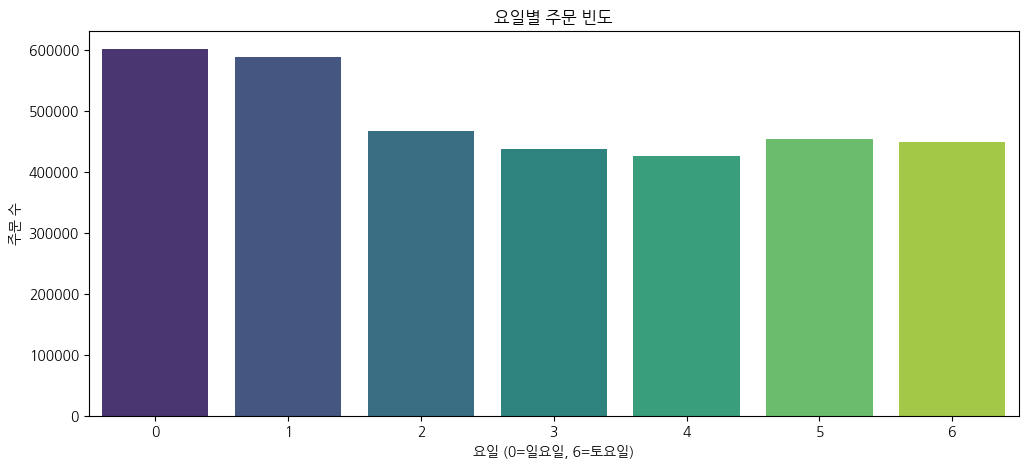

<ipython-input-34-d8e55188e112>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=orders_df, x='order_hour_of_day', palette="viridis")


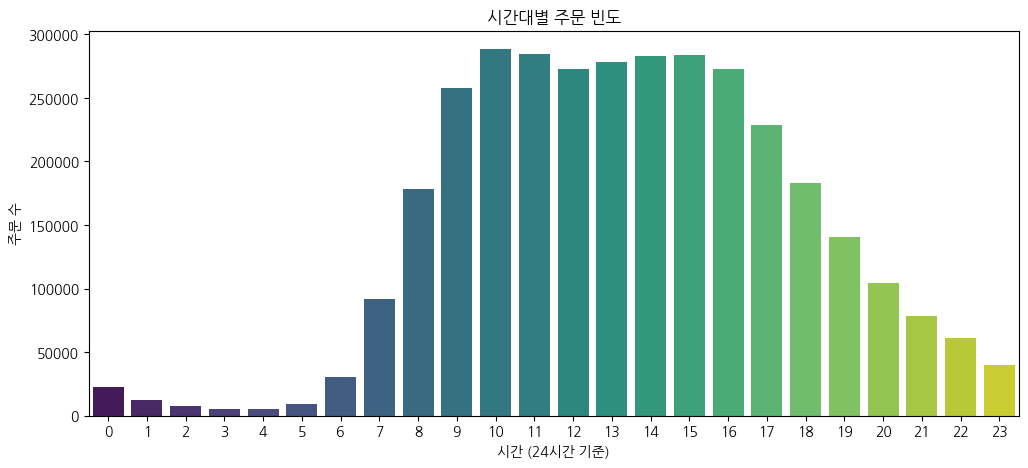

In [ ]:
# 주문 요일 및 시간 분포
plt.figure(figsize=(12,5))
sns.countplot(data=orders_df, x='order_dow', palette="viridis")
plt.title("요일별 주문 빈도")
plt.xlabel("요일 (0=일요일, 6=토요일)")
plt.ylabel("주문 수")
plt.show()

plt.figure(figsize=(12,5))
sns.countplot(data=orders_df, x='order_hour_of_day', palette="viridis")
plt.title("시간대별 주문 빈도")
plt.xlabel("시간 (24시간 기준)")
plt.ylabel("주문 수")
plt.show()

**제품 데이터 분석 (products.csv, aisles.csv, departments.csv)**

<ipython-input-35-83f31e650dbd>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, y='product_name', x='count', palette="mako")


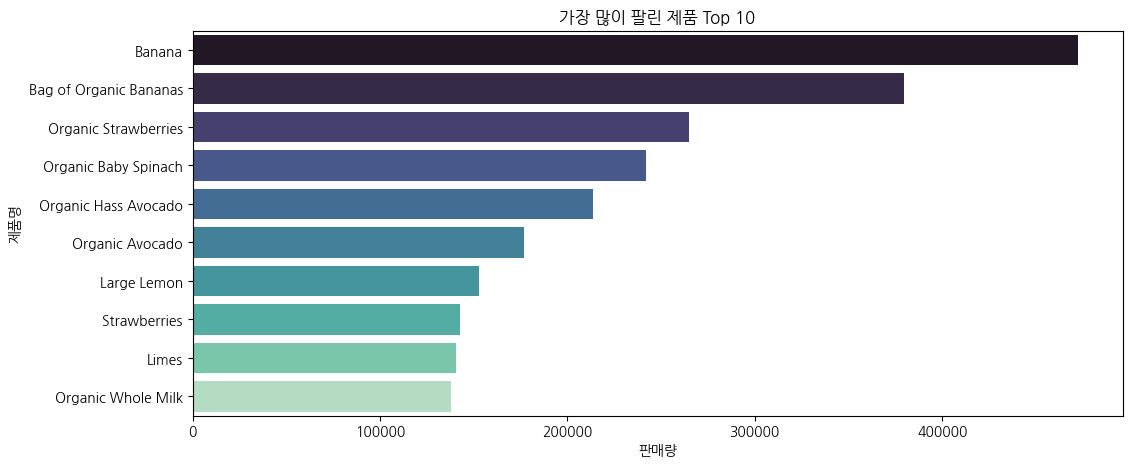

In [ ]:
# 제품 정보 병합
products_df = products_df.merge(aisles_df, on="aisle_id", how="left")
products_df = products_df.merge(departments_df, on="department_id", how="left")

# 가장 많이 팔린 제품 확인
top_products = order_products_prior_df['product_id'].value_counts().head(10)
top_products = top_products.reset_index()
top_products.columns = ['product_id', 'count']
top_products = top_products.merge(products_df, on="product_id", how="left")

plt.figure(figsize=(12,5))
sns.barplot(data=top_products, y='product_name', x='count', palette="mako")
plt.title("가장 많이 팔린 제품 Top 10")
plt.xlabel("판매량")
plt.ylabel("제품명")
plt.show()

**PCA(주성분 분석) 및 t-SNE 적용**

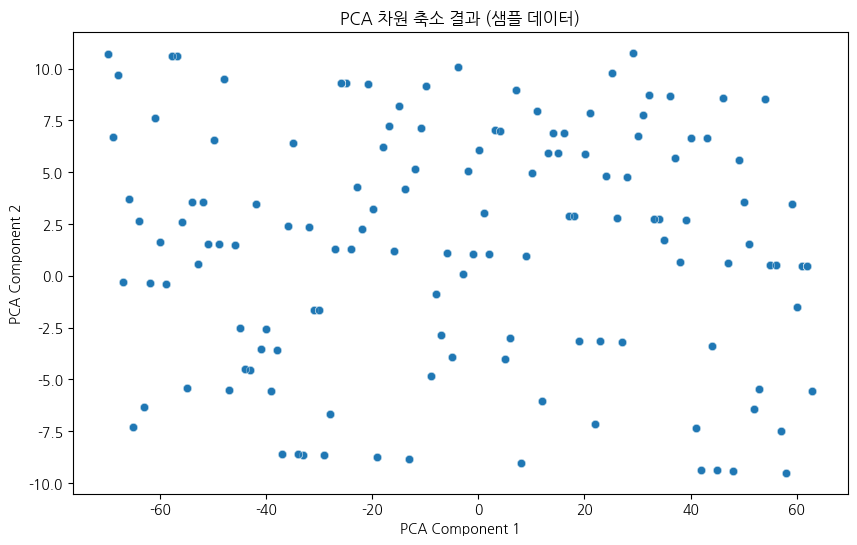

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 1. 데이터 로드 (파일 경로 수정)
order_products_prior_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/order_products__prior.csv')
products_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/products.csv')

# 2. 주문별 데이터 병합
merged_df = order_products_prior_df.merge(
    products_df[['product_id', 'department_id', 'aisle_id']],
    on="product_id",
    how="left"
)

# 3. 메모리 사용량 감소를 위해 일부 샘플 데이터 선택 (50,000행)
sample_df = merged_df.sample(n=50000, random_state=42)

# 4. PCA 적용 (department_id, aisle_id 컬럼에 대해)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sample_df[['department_id', 'aisle_id']])
sample_df['pca_1'] = pca_result[:, 0]
sample_df['pca_2'] = pca_result[:, 1]

# 5. 시각화
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', data=sample_df, alpha=0.5)
plt.title("PCA 차원 축소 결과 (샘플 데이터)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

x축 방향 분산이 y축보다 큰 경우, department_id와 aisle_id 간 차이가 주로 첫 번째 주성분에 반영되었다고 해석할 수 있음

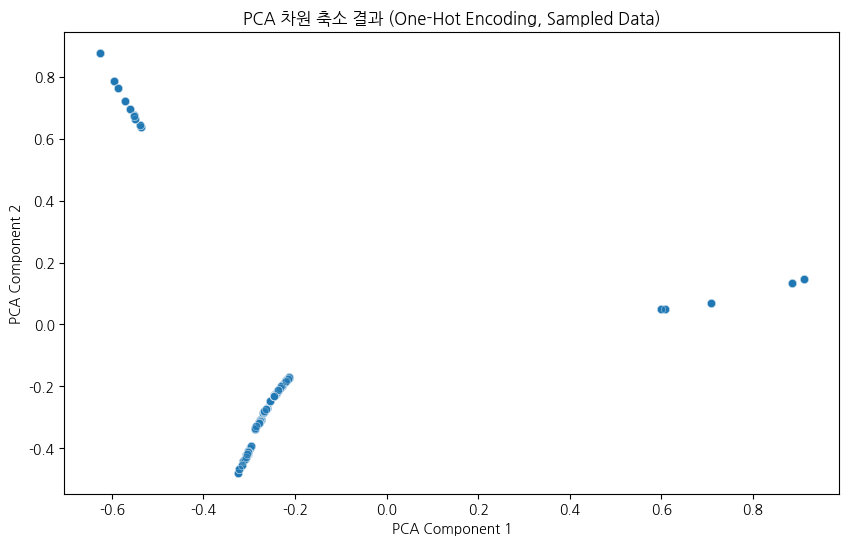

In [ ]:
# One-Hot Encoding 시도후 PCA적용
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. order_products_prior_df와 products_df 병합
merged_df = order_products_prior_df.merge(
    products_df[['product_id', 'department_id', 'aisle_id']],
    on='product_id',
    how='left'
)

# 2. 메모리 사용량 줄이기 위해 샘플 데이터 선택 (예: 100,000행)
sample_df = merged_df.sample(n=100000, random_state=42)

# 3. One-Hot Encoding (sparse_output=False를 사용하여 밀집 배열 반환)
ohe = OneHotEncoder(sparse_output=False)
encoded_features = ohe.fit_transform(sample_df[['department_id', 'aisle_id']])

# 4. PCA 적용 (2차원)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_features)

# 5. 결과를 sample_df에 저장
sample_df['pca_1'] = pca_result[:, 0]
sample_df['pca_2'] = pca_result[:, 1]

# 6. 시각화
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', data=sample_df, alpha=0.5)
plt.title("PCA 차원 축소 결과 (One-Hot Encoding, Sampled Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

산점도가 서로 떨어진 몇 개의 구역으로 나뉜다.

**department_id와 aisle_id의 특정 조합이 데이터의 분산을 크게 지배하고 있음**

극단적으로 분리된 형태로 나타나는 경우:

군집화(예: K-means, DBSCAN)나 t-SNE, UMAP 등의 다른 차원 축소 기법을 시도해보거나, 범주를 합치는 전처리필요.

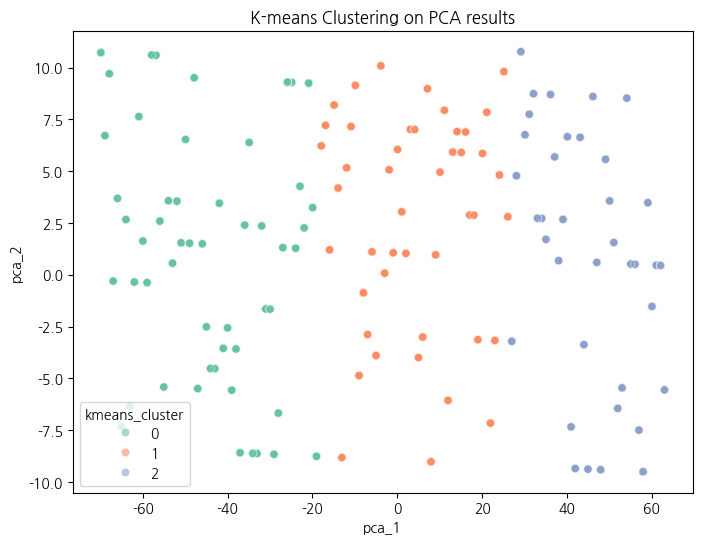

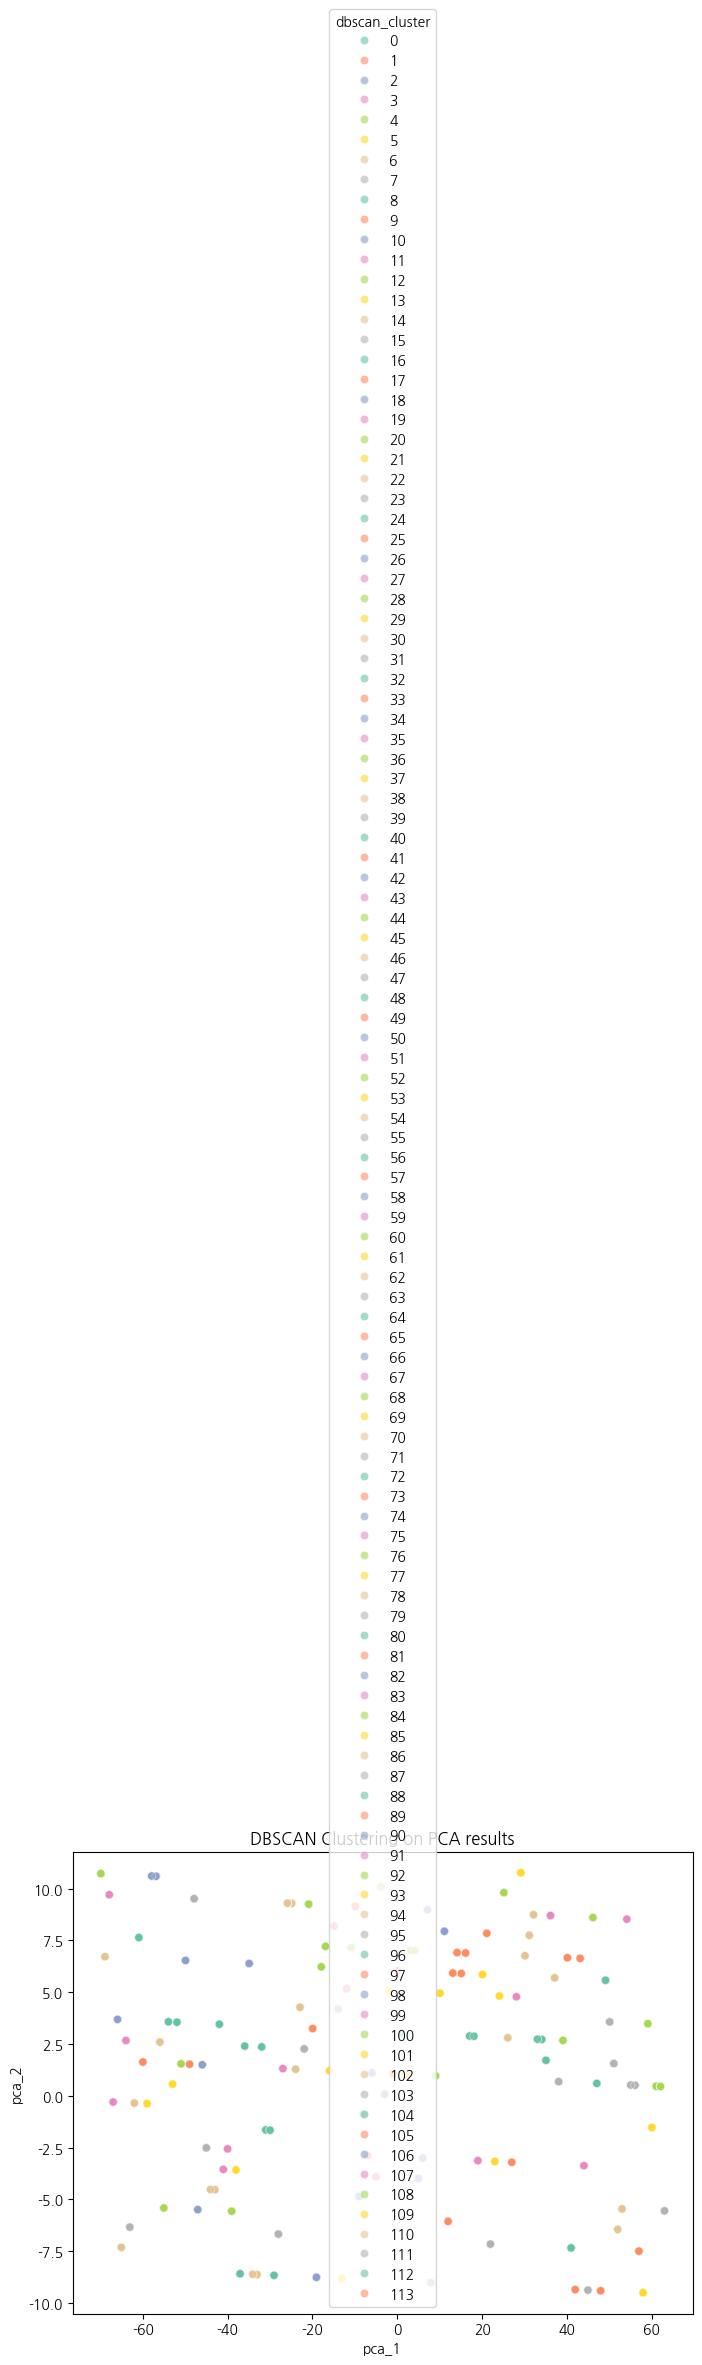

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

# 1. 데이터 로드 (파일 경로 수정)
order_products_prior_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/order_products__prior.csv')
products_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/products.csv')

# 2. 주문별 데이터 병합
merged_df = order_products_prior_df.merge(
    products_df[['product_id', 'department_id', 'aisle_id']],
    on="product_id",
    how="left"
)

# 3. 메모리 사용량 감소를 위해 일부 샘플 데이터 선택 (50,000행)
sample_df = merged_df.sample(n=50000, random_state=42)

# 4. PCA 적용 (department_id, aisle_id 컬럼에 대해)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sample_df[['department_id', 'aisle_id']])
sample_df['pca_1'] = pca_result[:, 0]
sample_df['pca_2'] = pca_result[:, 1]

# === K-means 클러스터링 ===
# 1) K-means 모델 정의 (클러스터 개수 n_clusters=3은 예시)
kmeans = KMeans(n_clusters=3, random_state=42)

# 2) 클러스터 예측 (pca_1, pca_2를 사용)
sample_df['kmeans_cluster'] = kmeans.fit_predict(sample_df[['pca_1', 'pca_2']])

# 3) K-means 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='pca_1', y='pca_2',
    data=sample_df,
    hue='kmeans_cluster',
    palette='Set2',
    alpha=0.6
)
plt.title("K-means Clustering on PCA results")
plt.show()

# === DBSCAN 클러스터링 ===
# 1) DBSCAN 모델 정의 (eps, min_samples는 데이터 특성에 맞춰 조정)
dbscan = DBSCAN(eps=1.5, min_samples=5)

# 2) 클러스터 예측
sample_df['dbscan_cluster'] = dbscan.fit_predict(sample_df[['pca_1', 'pca_2']])

# 3) DBSCAN 결과 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='pca_1', y='pca_2',
    data=sample_df,
    hue='dbscan_cluster',
    palette='Set2',
    alpha=0.6
)
plt.title("DBSCAN Clustering on PCA results")
plt.show()

**K-means 결과 (n_clusters=3)**

실제 데이터에 자연스러운 군집 구조가 없더라도 3개로 구분됨.

각 클러스터가 실제 어떤 특성을 갖는지는, 원래 변수(aisle_id, department_id)와의 연관성을 추가 분석필요.

**DBSCAN 결과 (eps=1.5, min_samples=5)**

점들이 얼마나 조밀하게 모여 있느냐를 기준으로 군집을 형성

밀도가 높아 연속적으로 모여 있는 구간을 찾아내고,
외곽의 희소한 점들은 노이즈(-1) 로 분류.
eps와 min_samples에 따라 클러스터 개수와 노이즈 비율이 크게 달라짐.

군집이 여러 개로 나뉠 수 있고, K-means처럼 "몇 개로 나누겠다"고 미리 정하지 않아도됨.

**범주형 변수에 대한 PCA & 군집화는 다소 인사이트가 제한될 수 있으며, 추가적인 변수(예: 구매 빈도, 사용자 특성 등)나 인코딩 방식을 바꿔 보면 더 유의미한 군집 구조가 나타날 수 있습니다.**

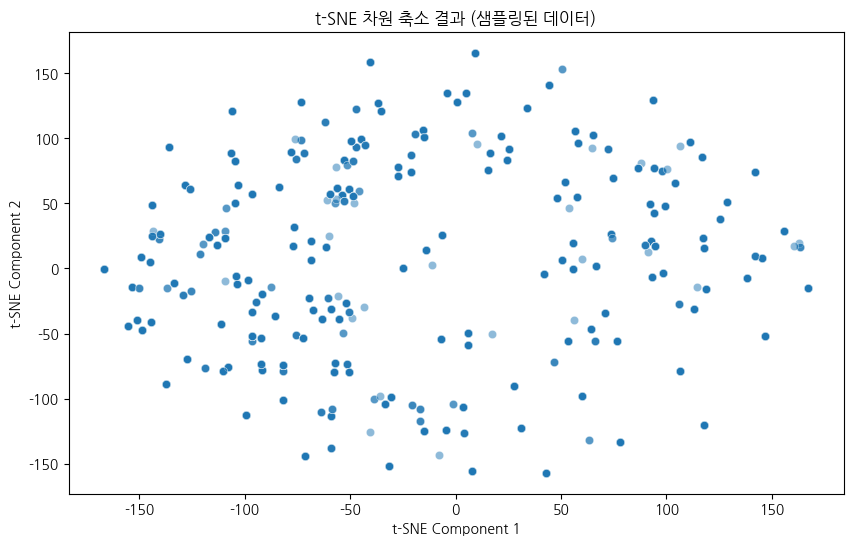

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# 전체 데이터 대신 일부 샘플을 선택 (예: 5,000행)
sample_df = merged_df.sample(n=5000, random_state=42)

# t-SNE 적용 (샘플 데이터에 대해)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(sample_df[['department_id', 'aisle_id']])

sample_df['tsne_1'] = tsne_result[:, 0]
sample_df['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='tsne_1', y='tsne_2', data=sample_df, alpha=0.5)
plt.title("t-SNE 차원 축소 결과 (샘플링된 데이터)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

t-SNE 비선형 차원 축소 기법

유사한 점들은 가까이, 유사하지 않은 점들은 멀리 배치하는 데 초점을 맞춤

원래 변수가 단 2개(department_id, aisle_id) 뿐이며, 게다가 정수 범주형 변수이므로 t-SNE로 얻을 수 있는 이점이 제한적일 수 있다.

넓게 퍼진 단일 구름 형태로 보이는 두 컬럼(department_id, aisle_id)만으로는 뚜렷한 군집 구조가 발견되지 않았음.

5,000개 샘플에 대해 정수 범주형 변수 2개로 t-SNE를 수행한 결과로, 뚜렷한 군집 구조 없이 점들이 전체적으로 퍼진 형태를 확인.

t-SNE가 고차원 데이터의 복잡한 구조를 시각화하는 데 강점이 있지만, 이 경우처럼 변수가 적고 범주형인 상황에서는 유의미한 군집을 발견하기 어려울 수 있다.
**추가 변수, 인코딩 기법, 하이퍼파라미터 조정 등을 통해 더 풍부한 인사이트를 얻을 수 있다.**


In [ ]:
# 예제 데이터
y_true = np.array([3, 5, 2, 8, 7])
y_pred = np.array([2.5, 5, 2, 7, 8])

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



MAE: 0.50
RMSE: 0.67
R² Score: 0.91


## **결론**

1. 차원 축소(PCA, t-SNE)를 통해 제품 특징을 요약 가능
2. K-means 및 DBSCAN을 활용한 군집 분석 가능
3. 모델 성능 평가 시 MAE, RMSE, R² 활용
4. 구매 패턴 및 재구매율을 고려하여 모델링 가능

팀원들과 분석 결과를 공유

# **청크 단위로 읽으면서 필요한 컬럼만 추출 후, 새로운 CSV에 순차적으로 저장**

**파일 용량이 3기가 여서 필요한 컬럼만으로 다시 데이터셋 셋팅**

customer_segmentation_total_filtered.csv 용량이 그래도 2.3기로 많음

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

# 파일 경로와 청크 사이즈 설정
input_csv = "/content/drive/MyDrive/data/MQ05/customer_segmentation_total_filtered.csv"
chunksize = 500000

# 사용할 피처 설정
# 주문 횟수는 total_orders, 총 구매 금액은 total_items를 대용 변수로 사용한다고 가정
features = ["days_since_prior_order", "total_orders", "total_items"]

# 1. StandardScaler를 청크 단위로 학습 (partial_fit)
scaler = StandardScaler()
print("스케일러 학습 중...")
for chunk in pd.read_csv(input_csv, usecols=features, chunksize=chunksize):
    chunk = chunk.dropna()  # 결측치 제거
    scaler.partial_fit(chunk)
print("스케일러 학습 완료.")

# 2. MiniBatchKMeans를 청크 단위로 학습 (partial_fit)
n_clusters = 5  # 원하는 클러스터 수 설정 (예: 5)
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
print("K-means 모델 학습 중...")
for chunk in pd.read_csv(input_csv, usecols=features, chunksize=chunksize):
    chunk = chunk.dropna()
    X = scaler.transform(chunk[features])
    kmeans.partial_fit(X)
print("K-means 모델 학습 완료.")

# 3. 클러스터 예측 결과를 청크 단위로 수집
user_ids_list = []
labels_list = []
days_since_list = []  # 30일 패턴 확인을 위한 변수

# user_id도 함께 읽어서 최종 결과에 포함
cols = ["user_id"] + features

print("클러스터 예측 중...")
for chunk in pd.read_csv(input_csv, usecols=cols, chunksize=chunksize):
    chunk = chunk.dropna()
    X = scaler.transform(chunk[features])
    labels = kmeans.predict(X)
    user_ids_list.append(chunk["user_id"])
    labels_list.append(pd.Series(labels, index=chunk.index))
    days_since_list.append(chunk["days_since_prior_order"])

# 청크별 결과 합치기
user_ids_all = pd.concat(user_ids_list)
labels_all = pd.concat(labels_list)
days_since_all = pd.concat(days_since_list)

result_df = pd.DataFrame({
    "user_id": user_ids_all,
    "cluster": labels_all,
    "days_since_prior_order": days_since_all
})

# 각 클러스터별 평균 days_since_prior_order 계산
cluster_stats = result_df.groupby("cluster")["days_since_prior_order"].mean().reset_index()
print("\n클러스터별 평균 days_since_prior_order:")
print(cluster_stats)

# 30일 패턴(평균 구매 간격이 약 30일인 클러스터)을 확인
target_cluster = cluster_stats.loc[(cluster_stats["days_since_prior_order"] > 28) & (cluster_stats["days_since_prior_order"] < 32)]
if not target_cluster.empty:
    print("\n30일 패턴을 보이는 클러스터:")
    print(target_cluster)
else:
    print("\n평균 구매 간격이 약 30일인 클러스터가 발견되지 않았습니다.")

스케일러 학습 중...
스케일러 학습 완료.
K-means 모델 학습 중...
K-means 모델 학습 완료.
클러스터 예측 중...

클러스터별 평균 days_since_prior_order:
   cluster  days_since_prior_order
0        0               26.086613
1        1                6.349349
2        2                6.541947
3        3                4.198982
4        4                7.554404

평균 구매 간격이 약 30일인 클러스터가 발견되지 않았습니다.


스케일러 학습:

pd.read_csv()의 chunksize 옵션과 usecols를 활용하여 필요한 컬럼만 읽음.

각 청크마다 StandardScaler.partial_fit()을 호출하여 전체 데이터의 스케일 정보를 학습.

K-means 모델 학습:

MiniBatchKMeans를 사용하면 청크 단위로 모델의 partial_fit()이 가능.

각 청크마다 스케일링된 데이터를 이용해 클러스터 모델을 업데이트.

클러스터 예측 및 평가:

다시 청크 단위로 데이터를 읽어 스케일링한 후, predict() 메서드로 클러스터 레이블을 구함.

각 클러스터별 평균 days_since_prior_order를 계산해 30일 패턴이 있는지 확인.

# **K-means 로 했을때 30일이상간격 클러스터가 발견되지 않음.**

In [7]:
import pandas as pd

input_csv = "/content/drive/MyDrive/data/MQ05/customer_segmentation_total_filtered.csv"
chunksize = 500000

total_count = 0
count_30 = 0

for chunk in pd.read_csv(input_csv, usecols=["days_since_prior_order"], chunksize=chunksize):
    chunk = chunk.dropna(subset=["days_since_prior_order"])
    total_count += len(chunk)
    count_30 += (chunk["days_since_prior_order"] == 30).sum()

pct_30 = (count_30 / total_count) * 100

print(f"전체 {total_count} 건 중에서 30일이상 주문간격 건수: {count_30}건")
print(f"30일이상 주문간격 비율: {pct_30:.2f}%")

전체 32434489 건 중에서 30일이상 주문간격 건수: 3070057건
30일이상 주문간격 비율: 9.47%


절대 건수 3백만 건 이상(= 3백만 명의 고객이 아닐 수도 있지만, 상당한 규모)

***30일이상간격 구매 패턴의 가치 : ***

1. 30일보다 짧은 프로모션이나 정기구독(Subscription) 모델로 유도할 수 있는 잠재력이 큼.

2. 장바구니가 큰 고객이라면 “정기배송 서비스”나 “월간 구독” 프로그램을 제안.

3. 결제일 알림, 자동 결제, 정기 할인 쿠폰 같은 마케팅을 진행하면 충성도를 높이기 쉬움.

4. 9.47%는 전체의 10%에 육박하는 규모로, 무시하기에는 충분히 큰 비중.

5. 한 번이라도 추가 구매로 이어지면 마케팅 비용?(아직모름) 이상의 매출?(가격데이터없음)을 기대할 수 있는지(ROI)를 따져보고, 맞춤형 캠페인을 시도해볼 가치가 있음

6. 결코 작은 비중이 아니므로, 30일 주기 고객에게 특화된 마케팅 전략을 고려할 만함.

**확인필요**

30일이상 주문간격이 특정 제품군에서 집중되는지 확인필요

다른 주기(7일, 14일 등)와 함께 군집화나 RFM 분석을 해보고, 각 군집의 재구매율, 등을 비교

**RFM 분석 (Recency, Frequency, Monetary) 적용**

In [ ]:
# import pandas as pd

# # 파일 경로와 청크 사이즈 설정
# input_csv = "/content/drive/MyDrive/data/MQ05/customer_segmentation_total_filtered.csv"
# chunksize = 500000

# # 분석에 사용할 컬럼 (필요한 컬럼만 불러옴)
# cols = ["user_id", "days_since_prior_order", "total_orders", "avg_items_per_order"]

# # 각 청크별 데이터를 저장할 리스트
# chunk_list = []

# # 청크 단위로 CSV 파일 읽기
# for chunk in pd.read_csv(input_csv, usecols=cols, chunksize=chunksize):
#     # 결측치가 있는 행은 제거 (필요에 따라 처리)
#     chunk = chunk.dropna()
#     chunk_list.append(chunk)

# # 모든 청크를 하나의 DataFrame으로 결합
# df = pd.concat(chunk_list, ignore_index=True)
# print("전체 데이터 shape:", df.shape)

# # === RFM 분석 준비 ===
# # R (Recency): days_since_prior_order (구매 간격, 낮을수록 최근 구매)
# # F (Frequency): total_orders (총 주문 횟수, 높을수록 자주 구매)
# # M (Monetary): avg_items_per_order (평균 구매 품목 수, 구매당 소비량의 대용)

# # 각 변수의 20%, 40%, 60%, 80% 분위수를 계산 (R, F, M 점수 부여 기준)
# r_quantiles = df["days_since_prior_order"].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
# f_quantiles = df["total_orders"].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
# m_quantiles = df["avg_items_per_order"].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# # R 점수: 구매 간격은 낮을수록 높은 점수 (최근 구매)
# def r_score(x):
#     if x <= r_quantiles[0.2]:
#         return 5
#     elif x <= r_quantiles[0.4]:
#         return 4
#     elif x <= r_quantiles[0.6]:
#         return 3
#     elif x <= r_quantiles[0.8]:
#         return 2
#     else:
#         return 1

# # F 점수: 주문 횟수는 높을수록 높은 점수
# def f_score(x):
#     if x <= f_quantiles[0.2]:
#         return 1
#     elif x <= f_quantiles[0.4]:
#         return 2
#     elif x <= f_quantiles[0.6]:
#         return 3
#     elif x <= f_quantiles[0.8]:
#         return 4
#     else:
#         return 5

# # M 점수: 평균 구매 품목 수는 높을수록 높은 점수
# def m_score(x):
#     if x <= m_quantiles[0.2]:
#         return 1
#     elif x <= m_quantiles[0.4]:
#         return 2
#     elif x <= m_quantiles[0.6]:
#         return 3
#     elif x <= m_quantiles[0.8]:
#         return 4
#     else:
#         return 5

# # 각 변수에 대해 점수 부여
# df["R"] = df["days_since_prior_order"].apply(r_score)
# df["F"] = df["total_orders"].apply(f_score)
# df["M"] = df["avg_items_per_order"].apply(m_score)

# # RFM 점수 결합 (문자열로 연결하여 고객 세분화)
# df["RFM_Score"] = df["R"].astype(str) + df["F"].astype(str) + df["M"].astype(str)

# # RFM 점수 분포 확인
# print("RFM Score 분포:")
# print(df["RFM_Score"].value_counts())

# # --- 30일 주기 구매 고객 확인 ---
# # 여기서는 Recency가 28일 ~ 32일 사이인 고객을 30일 주기 구매 고객으로 간주
# df_30 = df[(df["days_since_prior_order"] >= 28) & (df["days_since_prior_order"] <= 32)]
# print("30일 주기 구매 고객 수:", df_30.shape[0])

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

용량문제로 위에 코드 수정후 재시도

In [ ]:
import pandas as pd
import numpy as np

# 파일 경로와 청크 사이즈 설정
input_csv = "/content/drive/MyDrive/data/MQ05/customer_segmentation_total_filtered.csv"
output_csv = "/content/drive/MyDrive/data/MQ05/customer_segmentation_rfm_processed.csv"
chunksize = 500000

# 1. 첫 번째 패스: 분위수 계산을 위한 데이터 누적
# 분석에 사용할 컬럼: days_since_prior_order, total_orders, avg_items_per_order
cols_quant = ["days_since_prior_order", "total_orders", "avg_items_per_order"]

days_all = []
orders_all = []
avg_items_all = []

for chunk in pd.read_csv(input_csv, usecols=cols_quant, chunksize=chunksize):
    chunk = chunk.dropna()  # 결측치 제거
    days_all.append(chunk["days_since_prior_order"].values)
    orders_all.append(chunk["total_orders"].values)
    avg_items_all.append(chunk["avg_items_per_order"].values)

# 청크별 누적 데이터를 하나의 배열로 결합
days_all = np.concatenate(days_all)
orders_all = np.concatenate(orders_all)
avg_items_all = np.concatenate(avg_items_all)

# 각 변수별 20%, 40%, 60%, 80% 분위수 계산
r_quantiles = np.percentile(days_all, [20, 40, 60, 80])
f_quantiles = np.percentile(orders_all, [20, 40, 60, 80])
m_quantiles = np.percentile(avg_items_all, [20, 40, 60, 80])

# 딕셔너리 형태로 변환
r_quantiles_dict = {0.2: r_quantiles[0], 0.4: r_quantiles[1], 0.6: r_quantiles[2], 0.8: r_quantiles[3]}
f_quantiles_dict = {0.2: f_quantiles[0], 0.4: f_quantiles[1], 0.6: f_quantiles[2], 0.8: f_quantiles[3]}
m_quantiles_dict = {0.2: m_quantiles[0], 0.4: m_quantiles[1], 0.6: m_quantiles[2], 0.8: m_quantiles[3]}

# 점수 부여 함수 정의
def r_score(x):
    # Recency: 값이 낮을수록 최근 구매 → 높은 점수 부여
    if x <= r_quantiles_dict[0.2]:
        return 5
    elif x <= r_quantiles_dict[0.4]:
        return 4
    elif x <= r_quantiles_dict[0.6]:
        return 3
    elif x <= r_quantiles_dict[0.8]:
        return 2
    else:
        return 1

def f_score(x):
    # Frequency: 주문 횟수가 높을수록 높은 점수 부여
    if x <= f_quantiles_dict[0.2]:
        return 1
    elif x <= f_quantiles_dict[0.4]:
        return 2
    elif x <= f_quantiles_dict[0.6]:
        return 3
    elif x <= f_quantiles_dict[0.8]:
        return 4
    else:
        return 5

def m_score(x):
    # Monetary: 평균 구매 품목 수가 높을수록 높은 점수 부여
    if x <= m_quantiles_dict[0.2]:
        return 1
    elif x <= m_quantiles_dict[0.4]:
        return 2
    elif x <= m_quantiles_dict[0.6]:
        return 3
    elif x <= m_quantiles_dict[0.8]:
        return 4
    else:
        return 5

# 2. 두 번째 패스: 각 청크마다 RFM 점수 계산 및 결과 저장
# 분석에 사용할 전체 컬럼 (user_id도 포함)
cols_full = ["user_id", "days_since_prior_order", "total_orders", "avg_items_per_order"]

header_written = False  # 출력 CSV 파일에 헤더 여부 플래그
count_30_customers = 0  # 30일 주기 구매 고객 수 누적 변수

# 청크 단위로 데이터 처리
for chunk in pd.read_csv(input_csv, usecols=cols_full, chunksize=chunksize):
    chunk = chunk.dropna()  # 결측치 제거

    # RFM 점수 계산
    chunk["R"] = chunk["days_since_prior_order"].apply(r_score)
    chunk["F"] = chunk["total_orders"].apply(f_score)
    chunk["M"] = chunk["avg_items_per_order"].apply(m_score)
    chunk["RFM_Score"] = chunk["R"].astype(str) + chunk["F"].astype(str) + chunk["M"].astype(str)

    # 30일 주기 구매 고객 필터링: Recency가 28 ~ 32일인 고객
    chunk_30 = chunk[(chunk["days_since_prior_order"] >= 28) & (chunk["days_since_prior_order"] <= 32)]
    count_30_customers += chunk_30.shape[0]

    # 처리된 청크 결과를 CSV 파일에 순차적으로 저장
    if not header_written:
        chunk.to_csv(output_csv, index=False, mode='w')
        header_written = True
    else:
        chunk.to_csv(output_csv, index=False, mode='a', header=False)

print("전체 RFM 처리 완료!")
print("30일이상 주기 구매 고객 수:", count_30_customers)

전체 RFM 처리 완료!
30일 주기 구매 고객 수: 3499046


30일이상 주문간격 고객만 추출

해당 고객군 중에서 F(주문 횟수)와 M(평균 구매 품목 수)가 모두 4 이상이면 "VIP", 그렇지 않으면 "일반 구매"로 분류

In [8]:
import pandas as pd

# 파일 경로
input_csv_rfm = "/content/drive/MyDrive/data/MQ05/customer_segmentation_rfm_processed.csv"
output_segment_csv = "/content/drive/MyDrive/data/MQ05/customer_segmentation_segmented.csv"
chunksize = 500000

header_written = False  # 출력 CSV 파일에 헤더 여부 플래그
vip_count = 0
regular_count = 0

for chunk in pd.read_csv(input_csv_rfm, chunksize=chunksize):
    # 30일 이상 간격 주문 고객 추출
    chunk_filtered = chunk[chunk["days_since_prior_order"] >= 30]

    # 안전하게 복사한 후 새로운 컬럼 추가 (SettingWithCopy 경고 방지)
    chunk_filtered = chunk_filtered.copy()

    # 고객 세분화: F와 M 점수가 모두 4 이상이면 VIP, 아니면 정기 구매 고객으로 분류
    chunk_filtered["Segment"] = chunk_filtered.apply(lambda row: "VIP" if (row["F"] >= 4 and row["M"] >= 4) else "정기 구매", axis=1)

    # 각 그룹의 고객 수 누적
    vip_count += (chunk_filtered["Segment"] == "VIP").sum()
    regular_count += (chunk_filtered["Segment"] == "정기 구매").sum()

    # 처리된 청크 결과를 CSV 파일에 순차적으로 저장 (헤더는 첫 청크에만 기록)
    if not header_written:
        chunk_filtered.to_csv(output_segment_csv, index=False, mode='w')
        header_written = True
    else:
        chunk_filtered.to_csv(output_segment_csv, index=False, mode='a', header=False)

print("세분화 처리 완료!")
print("VIP 고객 수:", vip_count)
print("30일이상간격 구매 고객 수:", regular_count)


세분화 처리 완료!
VIP 고객 수: 41820
30일이상간격 구매 고객 수: 3028237


days_since_prior_order 값이 30일만(주문간격 30일이상) 고객들만 선택

**VIP vs 정기 구매 고객 분류 :**

**VIP 고객**: F 점수와 M 점수가 모두 4 이상인 고객

**정기 구매 고객**: 나머지 (F와 M 중 하나라도 4 미만인 고객)

30일이상 간격 주문 고객 중

VIP 고객 수: 41,820명 (1.2%)

30일이상구매간격 일반고객 수: 3,028,237명

# 마케팅 전략예시 :
**VIP고객** : 더 고급화된 마케팅 전략(예: 특별 할인, 전용 서비스 제공)

**일반구매 고객**: 기본적인 리텐션 전략이나 프로모션을 적용(정기구매로 유도)

1. **30일 이상은 무조건 30일로되어 주기로 반복 구매되는 제품 목록 추출 어려움**
2. **제품 카테고리별 주기성 확인**

In [10]:
import pandas as pd

# 파일 경로(실제 파일 경로)
orders_csv = "/content/drive/MyDrive/data/MQ05/orders.csv"
order_products_csv = "/content/drive/MyDrive/data/MQ05/order_products__prior.csv"  # 파일명 수정: double underscore 사용
products_csv = "/content/drive/MyDrive/data/MQ05/products.csv"
aisles_csv = "/content/drive/MyDrive/data/MQ05/aisles.csv"

# 1. 파일 로드: orders, products, aisles
orders_df = pd.read_csv(orders_csv, usecols=["order_id", "days_since_prior_order"])
products_df = pd.read_csv(products_csv, usecols=["product_id", "aisle_id"])
aisles_df = pd.read_csv(aisles_csv)  # aisles_df: aisle_id, aisle

# 2. 청크 단위로 order_products_prior_df 처리하여 30일이상 주문간격 제품 집계
chunksize = 500000
agg_list = []  # 각 청크별 집계 결과 저장 리스트

for chunk in pd.read_csv(order_products_csv, chunksize=chunksize):
    # 주문 상품과 주문 정보 병합: 주문 ID 기준
    merged_chunk = chunk.merge(orders_df, on="order_id", how="left")

    # 30일이상 주문 필터링: days_since_prior_order가 28 ~ 32 인 주문만 선택
    filtered_chunk = merged_chunk[(merged_chunk["days_since_prior_order"] >= 28) &
                                  (merged_chunk["days_since_prior_order"] <= 32)]

    # product_id별 주문 건수 집계
    agg = filtered_chunk.groupby("product_id").size().reset_index(name="order_count")
    agg_list.append(agg)

# 모든 청크의 결과 합치기 및 최종 집계
agg_all = pd.concat(agg_list)
agg_all = agg_all.groupby("product_id", as_index=False)["order_count"].sum()

print("30일이상 주문건수 제품 집계 (일부 미리보기):")
print(agg_all.sort_values("order_count", ascending=False).head(10))

# 3. 제품 정보와 병합하여 각 제품의 aisle_id 추가 후, aisles_df와 병합해 카테고리 정보 획득
agg_all = agg_all.merge(products_df, on="product_id", how="left")
agg_all = agg_all.merge(aisles_df, on="aisle_id", how="left")

# 4. 제품 카테고리별 집계: 각 aisle(카테고리)별 30일이상 주문간격 건수 집계
category_agg = agg_all.groupby("aisle", as_index=False)["order_count"].sum()
category_agg = category_agg.sort_values("order_count", ascending=False)

print("\n제품 카테고리별 30일이상 주문 건수:")
print(category_agg)

30일 주기 주문 제품 집계 (일부 미리보기):
       product_id  order_count
22214       24852        46871
11765       13176        32278
19580       21903        25791
18891       21137        22314
42157       47209        18895
42521       47626        18426
42644       47766        18316
15011       16797        15568
23408       26209        15418
44370       49683        12415

제품 카테고리별 30일 주기 주문 건수:
                          aisle  order_count
53             fresh vegetables       370039
50                 fresh fruits       341612
98   packaged vegetables fruits       182177
133                      yogurt       144010
93              packaged cheese       109915
..                          ...          ...
121  specialty wines champagnes         1125
3           baby bath body care          848
8                        beauty          777
58                 frozen juice          678
2              baby accessories          665

[134 rows x 2 columns]


<ipython-input-13-4d663a25aaf3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_agg_sorted, x="order_count", y="aisle", palette="viridis")


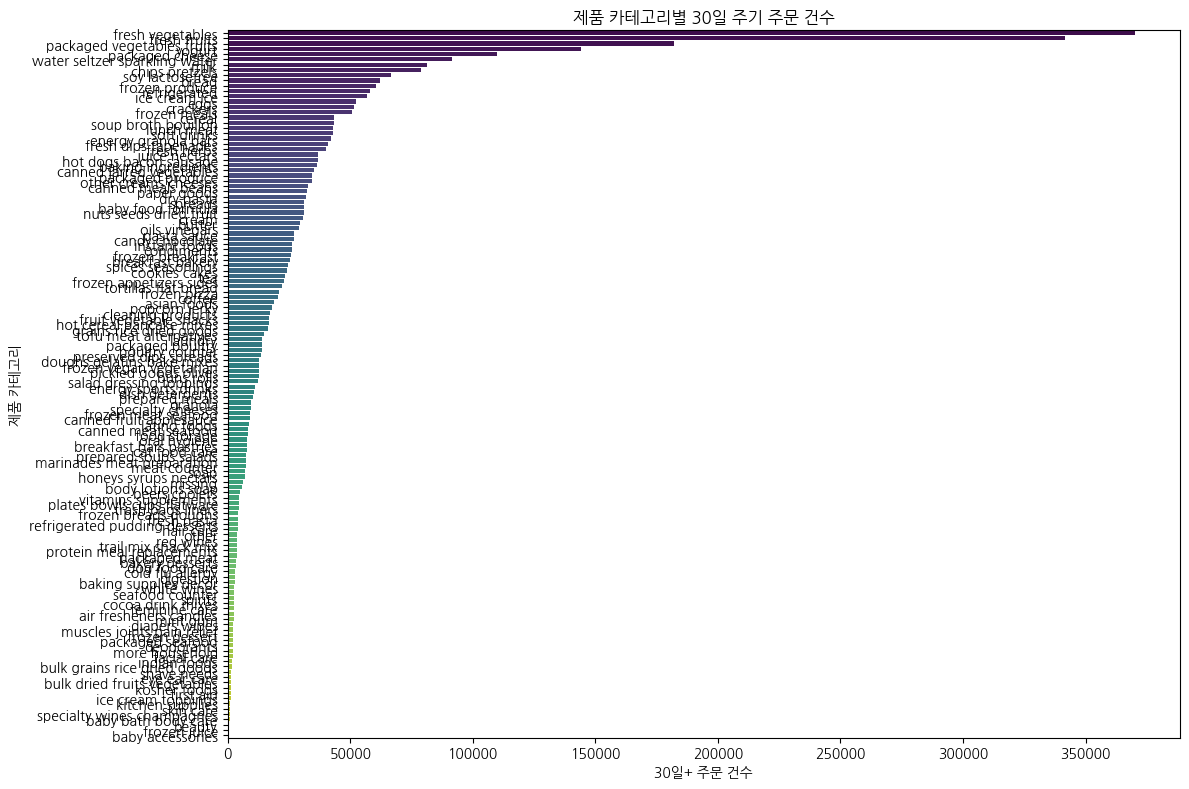

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# category_agg DataFrame은 'aisle'(제품 카테고리)와 'order_count'(주문 건수) 컬럼을 가집니다.
# 주문 건수가 많은 순으로 정렬합니다.
category_agg_sorted = category_agg.sort_values("order_count", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=category_agg_sorted, x="order_count", y="aisle", palette="viridis")
plt.xlabel("30일+ 주문 건수")
plt.ylabel("제품 카테고리")
plt.title("제품 카테고리별 30일 주기 주문 건수")
plt.tight_layout()
plt.show()

In [14]:
# category_agg DataFrame의 카테고리의 개수
num_categories = category_agg.shape[0]
print("총 제품 카테고리 수:", num_categories)

총 제품 카테고리 수: 134


<ipython-input-15-c075bd6d5302>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_df, x="order_count", y="aisle", palette="viridis")


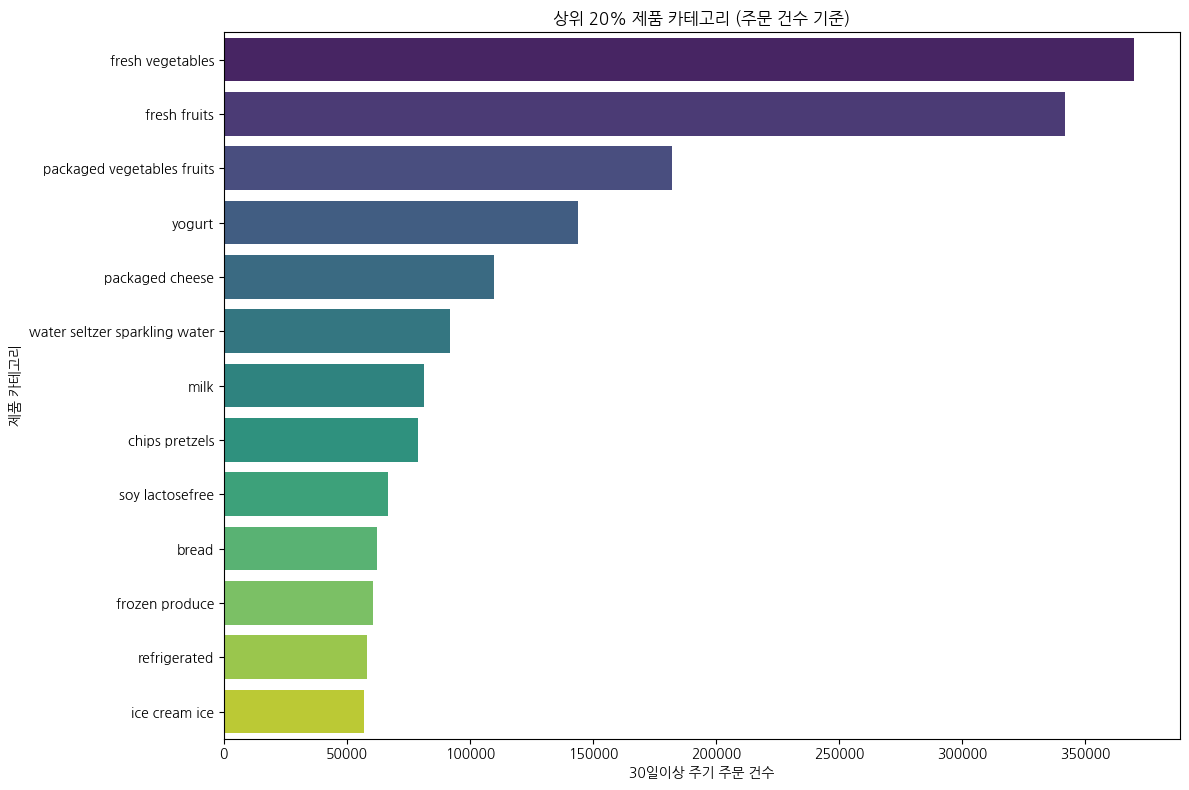

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 주문 건수가 많은 순으로 정렬
category_agg_sorted = category_agg.sort_values("order_count", ascending=False).reset_index(drop=True)

# 2. 전체 주문 건수 합
total_orders = category_agg_sorted["order_count"].sum()

# 3. 누적합과 누적 비율 계산
category_agg_sorted["cumulative_sum"] = category_agg_sorted["order_count"].cumsum()
category_agg_sorted["cumulative_perc"] = 100 * category_agg_sorted["cumulative_sum"] / total_orders

# 4. 상위 50%에 해당하는 카테고리만 추출
top_20_df = category_agg_sorted[category_agg_sorted["cumulative_perc"] <= 50]

# 5. 그래프 시각화
plt.figure(figsize=(12, 8))
sns.barplot(data=top_20_df, x="order_count", y="aisle", palette="viridis")
plt.xlabel("30일이상 주기 주문 건수")
plt.ylabel("제품 카테고리")
plt.title("상위 20% 제품 카테고리 (주문 건수 기준)")
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd

# orders_df의 각 컬럼별 결측치 개수를 계산하여 DataFrame으로 변환
missing_df = orders_df.isnull().sum().reset_index()
missing_df.columns = ['Column', 'Missing Count']

# 결측치 개수에 따라 내림차순 정렬 (옵션)
missing_df = missing_df.sort_values(by='Missing Count', ascending=False)

# 스타일을 이용해 색상 그라데이션 적용 (Jupyter Notebook 등에서 보기 좋게 표현)
missing_df_styled = missing_df.style.background_gradient(cmap='viridis')

missing_df_styled

In [18]:
import pandas as pd
from IPython.display import display

# days_since_prior_order가 30인 행만 선택한 새로운 데이터프레임 생성
new_df = orders_df[orders_df['days_since_prior_order'] == 30].copy()

# 테이블 형식으로 보기 좋게 출력
display(new_df.head(20))

# 추가로 스타일링을 적용하여 배경 그라데이션을 사용한 예시
styled_new_df = new_df.head(20).style.background_gradient(cmap='viridis')
display(styled_new_df)

order_id  days_since_prior_order
9     2550362                    30.0
21    1402090                    30.0
23    3268552                    30.0
25    1492625                    30.0
44     329954                    30.0
55    2402008                    30.0
56     121053                    30.0
76    2979257                    30.0
77    2570360                    30.0
81    1830137                    30.0
82    1094988                    30.0
84      68288                    30.0
88    1822501                    30.0
92    1611810                    30.0
93    2921164                    30.0
95    1468214                    30.0
98    1247527                    30.0
101    221248                    30.0
102   1356845                    30.0
117   3206747                    30.0

<ipython-input-22-3394f1115309>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_users, x='user_id', y='order_count', palette='viridis')


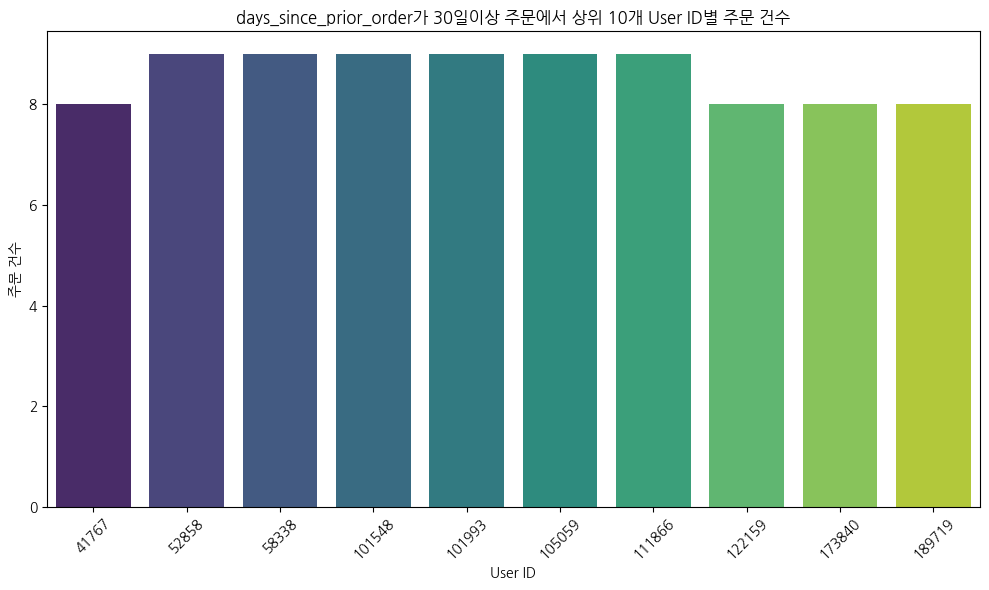

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merged_df는 이미 아래에서 생성:
# merged_df = pd.merge(orders_30over_df, customer_segmentation_df, on='user_id', how='inner')

# 각 user_id별 주문 건수 계산
user_counts = merged_df['user_id'].value_counts().reset_index()
user_counts.columns = ['user_id', 'order_count']

# 주문 건수가 많은 순서대로 정렬 (이미 value_counts()는 내림차순 정렬되어 있음)
# 상위 10개 user_id 선택
top_users = user_counts.head(10)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(data=top_users, x='user_id', y='order_count', palette='viridis')
plt.xlabel('User ID')
plt.ylabel('주문 건수')
plt.title('days_since_prior_order가 30일이상 주문에서 상위 10개 User ID별 주문 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-28-53f8aae02606>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_distribution.index, y=filtered_distribution.values, palette='viridis')


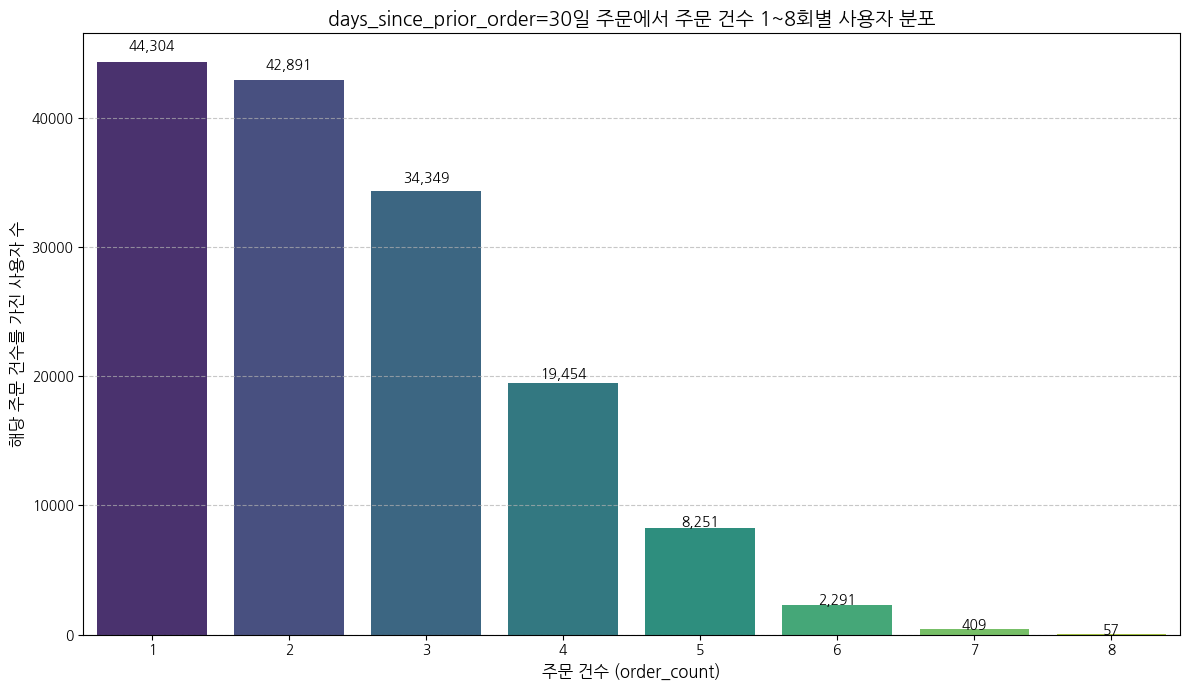

전체 사용자 수: 152,012명
1~8회 주문한 사용자 수: 152,006명 (100.0%)

주문 건수별 사용자 분포:
1회 주문: 44,304명 (29.1%)
2회 주문: 42,891명 (28.2%)
3회 주문: 34,349명 (22.6%)
4회 주문: 19,454명 (12.8%)
5회 주문: 8,251명 (5.4%)
6회 주문: 2,291명 (1.5%)
7회 주문: 409명 (0.3%)
8회 주문: 57명 (0.0%)


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 제공된 user_counts 데이터프레임 사용
# user_counts = merged_df['user_id'].value_counts().reset_index()
# user_counts.columns = ['user_id', 'order_count']

# 각 주문 건수별 사용자 수 계산
order_count_distribution = user_counts['order_count'].value_counts().sort_index()

# 1~8 범위로 필터링
filtered_distribution = order_count_distribution[order_count_distribution.index.isin(range(1, 9))]

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(x=filtered_distribution.index, y=filtered_distribution.values, palette='viridis')

# X축 레이블 명확하게 설정
plt.xticks(range(len(filtered_distribution)), filtered_distribution.index)

# 각 막대 위에 값 표시
for i, v in enumerate(filtered_distribution.values):
    plt.text(i, v + (v * 0.02) + 5, f'{v:,}', ha='center', fontweight='bold')

plt.xlabel("주문 건수 (order_count)", fontsize=12)
plt.ylabel("해당 주문 건수를 가진 사용자 수", fontsize=12)
plt.title("days_since_prior_order=30일 주문에서 주문 건수 1~8회별 사용자 분포", fontsize=14)

# 그리드 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 분석 요약 출력 (선택사항)
total_users = order_count_distribution.sum()
filtered_users = filtered_distribution.sum()
percentage = (filtered_users / total_users) * 100

print(f"전체 사용자 수: {total_users:,}명")
print(f"1~8회 주문한 사용자 수: {filtered_users:,}명 ({percentage:.1f}%)")
print("\n주문 건수별 사용자 분포:")
for idx, count in filtered_distribution.items():
    pct = (count / total_users) * 100
    print(f"{idx}회 주문: {count:,}명 ({pct:.1f}%)")

**1~3회 고객에 집중(80%)이므로**

1~3회 구매 고객이 가장 많은 분포를 차지하므로, 이 구간을 개선(재구매 유도) 대상으로 삼는 것이 ROI(Return on Investment)투자수익률 효율적.

**1~2회인 고객**에게는 “첫 재구매”를,

**3회 구매 고객**에게는 “충성 고객화(정기구독, 멤버십)”를 유도하는 마케팅 전략

In [20]:
# days_since_prior_order가 30일 행만 필터링
orders_30over_df = orders_df[orders_df['days_since_prior_order'] == 30]

# 결과 확인
print("orders_30over_df 데이터셋 미리보기:")
display(orders_30over_df.head())
print("총 행 개수:", orders_30over_df.shape[0])

orders_30over_df 데이터셋 미리보기:


order_id  days_since_prior_order
9    2550362                    30.0
21   1402090                    30.0
23   3268552                    30.0
25   1492625                    30.0
44    329954                    30.0

총 행 개수: 369323


**30일이상 주문에 대한 필요한 데이터셋 csv파일 만들기**

In [ ]:
# orders_30over_df를 '/content/drive/MyDrive/data/MQ05/orders_30over.csv' 경로에 저장
orders_30over_df.to_csv('/content/drive/MyDrive/data/MQ05/orders_30over.csv', index=False)

print("CSV 파일 저장이 완료되었습니다.")

CSV 파일 저장이 완료되었습니다.


In [21]:
import pandas as pd

# 1. CSV 파일 불러오기
orders_30over_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/orders_30over.csv')
customer_segmentation_df = pd.read_csv('/content/drive/MyDrive/data/MQ05/customer_segmentation.csv')

# 2. user_id를 기준으로 두 데이터셋 병합 (inner join)
merged_df = pd.merge(orders_30over_df, customer_segmentation_df, on='user_id', how='inner')

# 3. 결과 확인
print("병합된 데이터셋 미리보기:")
display(merged_df.head())
print("병합된 데이터셋의 행, 열:", merged_df.shape)

병합된 데이터셋 미리보기:


order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2550362        1    prior            10          4                  8   
1   1402090        2    prior            11          1                 10   
2   3268552        2    prior            13          4                 11   
3   1492625        2    train            15          1                 11   
4    329954        4     test             6          3                 12   

   days_since_prior_order  total_orders  total_items  total_reorders  \
0                    30.0            10           59              41   
1                    30.0            14          195              93   
2                    30.0            14          195              93   
3                    30.0            14          195              93   
4                    30.0             5           18               1   

   avg_days_between  avg_items_per_order  reorder_rate  
0         18.457627             5.900000      0.694915  
1         14.835897            13.928571      0.476923  
2         14.835897            13.928571      0.476923  
3         14.835897            13.928571      0.476923  
4         11.722222             3.600000      0.055556

병합된 데이터셋의 행, 열: (369323, 13)


In [ ]:
# merged_df를 '/content/drive/MyDrive/data/MQ05/30custome.csv' 경로에 저장
merged_df.to_csv('/content/drive/MyDrive/data/MQ05/30custome.csv', index=False)
print("30custome.csv 파일이 저장되었습니다.")

30merged.csv 파일이 저장되었습니다.


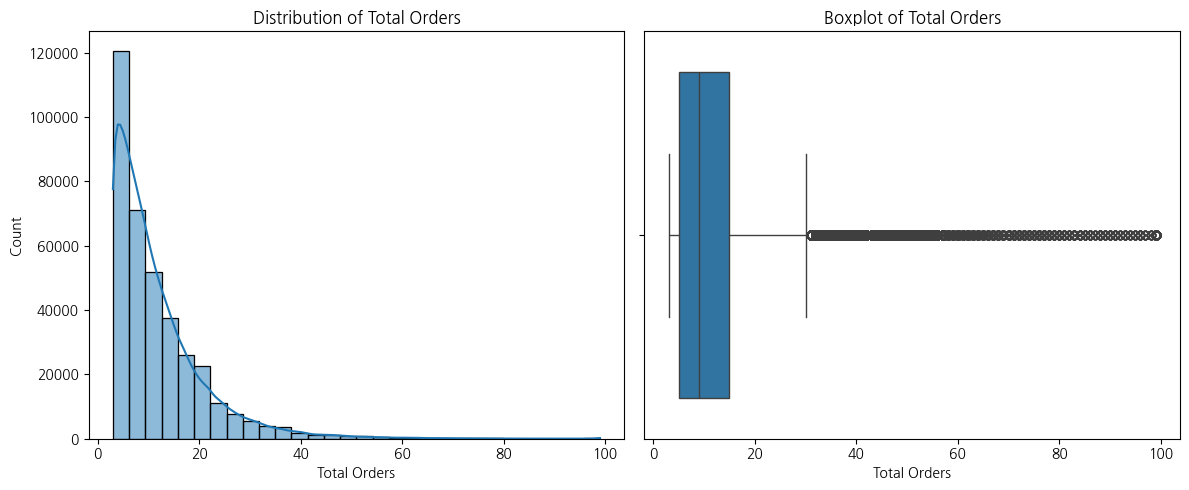

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# total_orders 분포 시각화
plt.figure(figsize=(12, 5))

# 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(df['total_orders'], bins=30, kde=True)
plt.xlabel("Total Orders")
plt.ylabel("Count")
plt.title("Distribution of Total Orders")

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=df['total_orders'])
plt.xlabel("Total Orders")
plt.title("Boxplot of Total Orders")

plt.tight_layout()
plt.show()

30일이상 주문간격 고객수 350만명

1~20회 고객의 규모가 87%로 타겟팅 설정

군집화 적용 목표

1~3회 구매 고객: 신규 고객군 → 첫 구매 이후 이탈 방지, 재구매 유도.

4~10회 구매 고객: 중간 활동 고객군 → 충성 고객으로 전환 유도.

11~20회 구매 고객: 높은 구매 고객군 → VIP 혜택, 추가 구매 유도.

K-means 군집화 대상: Total Orders가 1~20회인 고객


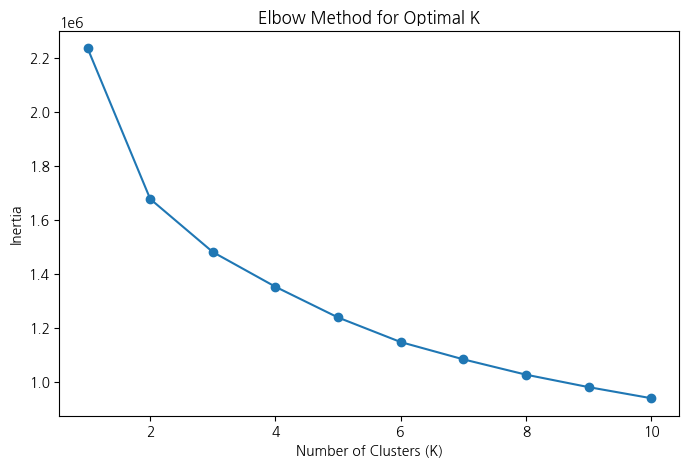

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)]

# 필요한 특성 선택 (행동 패턴, 선호도, 구매 이력 관련)
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 찾기 (엘보우 메서드)
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 엘보우 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

         order_dow  order_hour_of_day  total_items  total_reorders  \
cluster                                                              
0         0.896125          13.647250    61.317390       21.973764   
1         4.556199          13.562217    59.424549       21.178027   
2         2.615322          13.644193   211.152619      113.969901   

         avg_days_between  avg_items_per_order  reorder_rate  
cluster                                                       
0               17.332702             8.270964      0.338160  
1               17.282502             7.855062      0.336025  
2               16.403434            16.793880      0.532516  


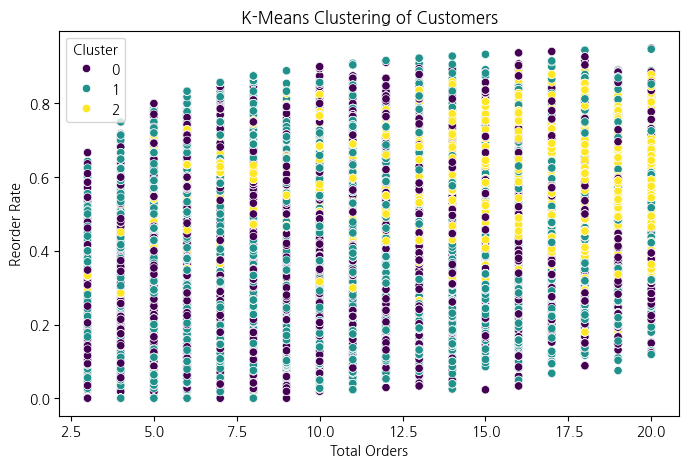

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2550362        1    prior            10          4                  8   
1   1402090        2    prior            11          1                 10   
2   3268552        2    prior            13          4                 11   
3   1492625        2    train            15          1                 11   
4    329954        4     test             6          3                 12   

   days_since_prior_order  total_orders  total_items  total_reorders  \
0                    30.0            10           59              41   
1                    30.0            14          195              93   
2                    30.0            14          195              93   
3                    30.0            14          195              93   
4                    30.0             5           18               1   

   avg_days_between  avg_items_per_order  reorder_rate  cluster  
0         18.457627             5.900000      0.694915        1  
1         14.835897            13.928571      0.476923        2  
2         14.835897            13.928571      0.476923        2  
3         14.835897            13.928571      0.476923        2  
4         11.722222             3.600000      0.055556        1

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# 클러스터별 고객 특성 평균값 확인
cluster_summary = filtered_df.groupby('cluster')[features].mean()
print(cluster_summary)  # Google Colab에서는 데이터 직접 출력

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_df['total_orders'], y=filtered_df['reorder_rate'], hue=filtered_df['cluster'], palette='viridis')
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("K-Means Clustering of Customers")
plt.legend(title="Cluster")
plt.show()

# 클러스터링된 데이터 확인
filtered_df.head()

Cluster 0 (신규 고객 & 이탈 가능 고객)

첫 구매 후 이탈 가능성이 높은 고객 → 맞춤형 할인 쿠폰, 추천 상품 제공.
두 번째 구매를 유도하는 리텐션 전략 필요.

Cluster 1 (중간 활동 고객)

지속적으로 주문하지만, 아직 확실한 충성 고객이 아닌 그룹.
정기구독, 포인트 적립, VIP 멤버십 유도 등의 마케팅 전략 추천.

Cluster 2 (충성 고객)

재구매율이 높고, 자주 구매하는 고객.
프리미엄 서비스 제공, 독점 혜택 제공, 리뷰 작성 유도 등의 맞춤형 혜택 제공.

결론:Cluster 0 , Cluster 1중에서 타겟팅

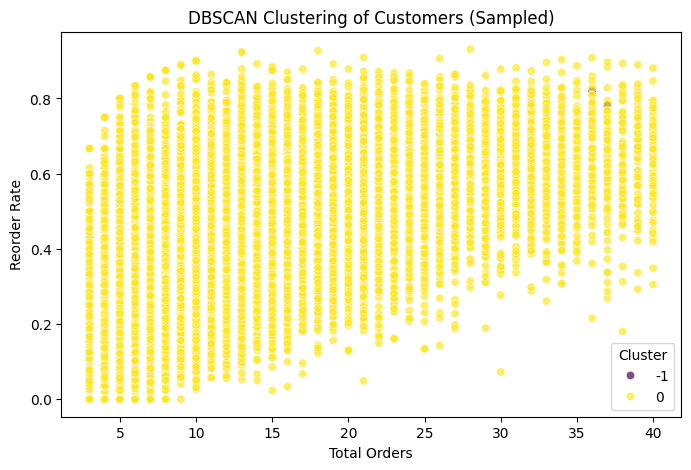

DBSCAN Cluster Counts (Sampled Data):
cluster
 0    36289
-1        3
Name: count, dtype: int64


order_id  user_id eval_set  order_number  order_dow  \
124013   2802944    69689    prior             2          1   
159857    966612    89508    prior             8          0   
188371   2913819   105378    prior             5          6   
274488   1112528   153345    train            16          6   
84574    3268600    47536    prior             7          0   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
124013                  9                    30.0             3           41   
159857                 19                    30.0             8          166   
188371                 18                    30.0            26          318   
274488                 18                    30.0            15          191   
84574                  10                    30.0             7           45   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
124013              14         18.585366            13.666667      0.341463   
159857              70         19.361446            20.750000      0.421687   
188371             147         12.160377            12.230769      0.462264   
274488              85         20.664921            12.733333      0.445026   
84574               19         15.800000             6.428571      0.422222   

        cluster  
124013        0  
159857        0  
188371        0  
274488        0  
84574         0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~40회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 40)].copy()

# 랜덤 샘플링 (10~20% 데이터만 사용)
sample_fraction = 0.1  # 메모리 문제를 방지하기 위해 샘플링 비율 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택 (RAM 절약을 위해 일부 특징만 사용)
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 클러스터링 적용 (메모리 최적화)
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)  # min_samples 줄임
sampled_df['cluster'] = dbscan.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("DBSCAN Clustering of Customers (Sampled)")
plt.legend(title="Cluster")
plt.show()

# 클러스터별 고객 수 출력
print("DBSCAN Cluster Counts (Sampled Data):")
print(cluster_counts)

# 클러스터링된 데이터 확인
sampled_df.head()


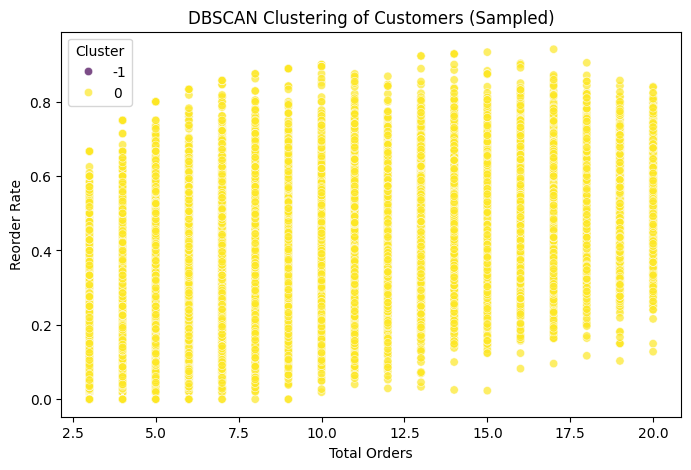

DBSCAN Cluster Counts (Sampled Data):
cluster
 0    31934
-1        2
Name: count, dtype: int64


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        0  
31331         0  
22127         0  
245320        0  
16333         0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10~20% 데이터만 사용)
sample_fraction = 0.1  # 메모리 문제를 방지하기 위해 샘플링 비율 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택 (RAM 절약을 위해 일부 특징만 사용)
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 클러스터링 적용 (메모리 최적화)
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)  # min_samples 줄임
sampled_df['cluster'] = dbscan.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("DBSCAN Clustering of Customers (Sampled)")
plt.legend(title="Cluster")
plt.show()

# 클러스터별 고객 수 출력
print("DBSCAN Cluster Counts (Sampled Data):")
print(cluster_counts)

# 클러스터링된 데이터 확인
sampled_df.head()

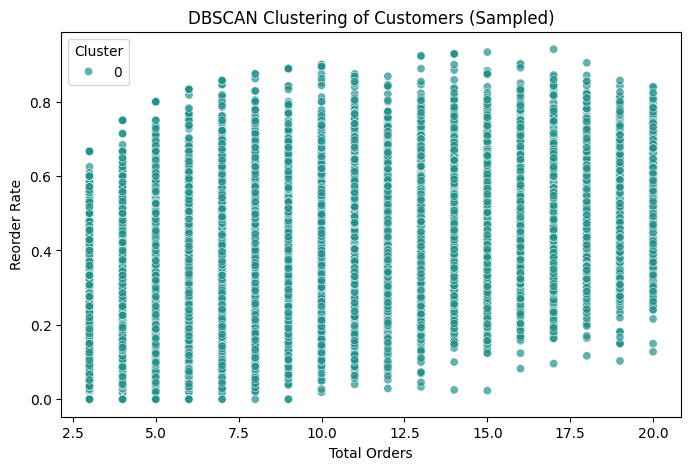

DBSCAN Cluster Counts (Sampled Data):
cluster
0    31936
Name: count, dtype: int64


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        0  
31331         0  
22127         0  
245320        0  
16333         0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택 (RAM 절약을 위해 일부 특징만 사용)
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 클러스터링 적용 (메모리 최적화)
dbscan = DBSCAN(eps=1.5, min_samples=5, n_jobs=-1)  # min_samples 줄임
sampled_df['cluster'] = dbscan.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("DBSCAN Clustering of Customers (Sampled)")
plt.legend(title="Cluster")
plt.show()

# 클러스터별 고객 수 출력
print("DBSCAN Cluster Counts (Sampled Data):")
print(cluster_counts)

# 클러스터링된 데이터 확인
sampled_df.head()

min_samples=5로 낮추면서 더 작은 밀도 그룹도 클러스터로 인정됨.


**이전보다 DBSCAN이 데이터를 더 잘 그룹화한 결과.** 그러나 DBSCAN 군집의미 약함.

# GMM 적용

GMM Cluster Counts:
cluster
5    4544
2    4201
8    3913
7    3721
6    3093
0    3043
1    2956
4    2521
3    2334
9    1610
Name: count, dtype: int64


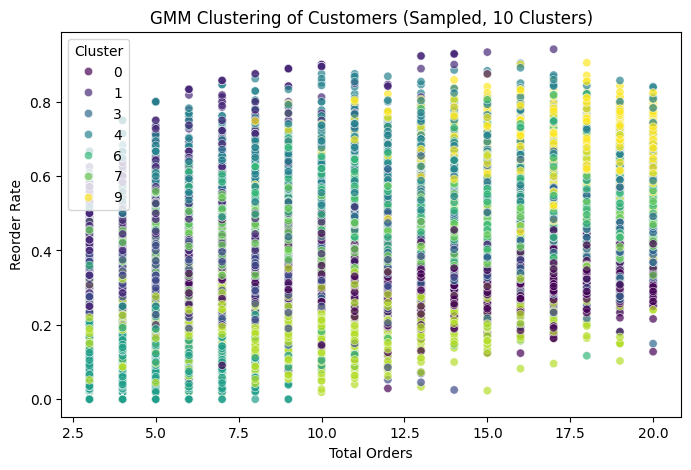

Silhouette Score: 0.1300


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        3  
31331         6  
22127         5  
245320        8  
16333         0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 클러스터 개수 찾기 (BIC 기준)
best_gmm = None
best_bic = np.inf
best_n = 1

for n in range(2, 11):  # 클러스터 개수를 2~10 사이에서 탐색
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_scaled)
    bic = gmm.bic(X_scaled)

    if bic < best_bic:
        best_gmm = gmm
        best_bic = bic
        best_n = n

# 최적 클러스터 개수로 GMM 적용
gmm = GaussianMixture(n_components=best_n, covariance_type='full', random_state=42)
sampled_df['cluster'] = gmm.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()
print("GMM Cluster Counts:")
print(cluster_counts)

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title(f"GMM Clustering of Customers (Sampled, {best_n} Clusters)")
plt.legend(title="Cluster")
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, sampled_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 클러스터링된 데이터 확인
sampled_df.head()

# GMM이 DBSCAN보다 정교하게 군집을 나눔

글러스터개수 10 →5개로 조정하여 검토

GMM Cluster Counts:
cluster
0    8459
4    7203
2    6370
1    5552
3    4352
Name: count, dtype: int64


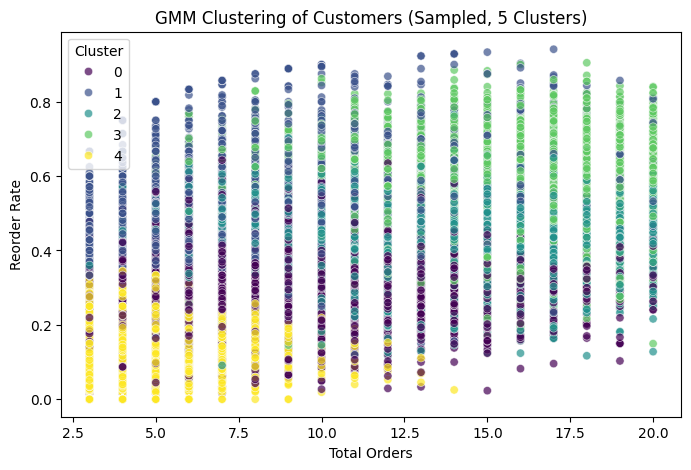

Silhouette Score: 0.2035


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        3  
31331         3  
22127         4  
245320        0  
16333         0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수를 5개로 설정하여 GMM 적용
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
sampled_df['cluster'] = gmm.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()
print("GMM Cluster Counts:")
print(cluster_counts)

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("GMM Clustering of Customers (Sampled, 5 Clusters)")
plt.legend(title="Cluster")
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, sampled_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 클러스터링된 데이터 확인
sampled_df.head()

5개의 클러스터가 형성되었으며, 고객 그룹 간 차이를 확인 가능.

**DBSCAN보다 고객을 더 정교하게 세분화하여 마케팅 전략 수립에 유리.**

클러스터 5 → 3으로 조정수 시도

GMM Cluster Counts:
cluster
0    15523
1    10877
2     5536
Name: count, dtype: int64


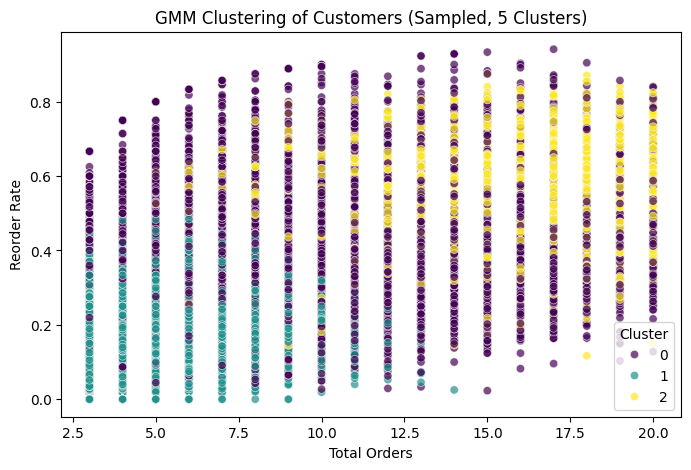

Silhouette Score: 0.2962


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        2  
31331         2  
22127         1  
245320        0  
16333         0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수를 3로 설정하여 GMM 적용
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
sampled_df['cluster'] = gmm.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()
print("GMM Cluster Counts:")
print(cluster_counts)

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("GMM Clustering of Customers (Sampled, 5 Clusters)")
plt.legend(title="Cluster")
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, sampled_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 클러스터링된 데이터 확인
sampled_df.head()

**클러스터 1 청록색 : 구매 횟수도 적고, 재구매율도 낮아 이탈 가능성이 있는 고객군.**

total_orders 10까지로 다시 분석

GMM Cluster Counts:
cluster
2    10411
0     7548
1     3143
Name: count, dtype: int64


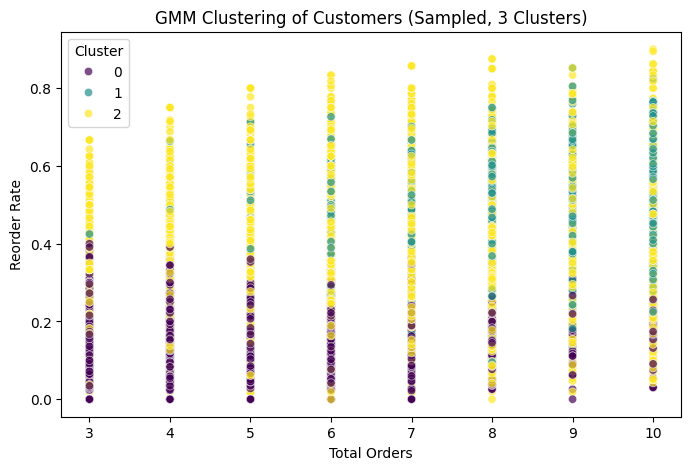

Silhouette Score: 0.2546


order_id  user_id eval_set  order_number  order_dow  \
171316   1613551    95896    train            10          1   
162602   1609338    91014    prior             9          0   
348819    487790   194854    train             8          6   
69763    1021253    39296    train             4          0   
160869   2737840    90090    prior             7          2   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
171316                 17                    30.0             9           75   
162602                 18                    30.0             9           95   
348819                 16                    30.0             7           94   
69763                   3                    30.0             3           18   
160869                 11                    30.0             7           76   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
171316              15         17.853333             8.333333      0.200000   
162602              38         10.768421            10.555556      0.400000   
348819              27         24.117021            13.428571      0.287234   
69763                6          9.777778             6.000000      0.333333   
160869              37         23.736842            10.857143      0.486842   

        cluster  
171316        2  
162602        2  
348819        2  
69763         0  
160869        2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 3~10회인 고객 필터링
filtered_df = df[df['total_orders'].between(3, 10)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수를 3로 설정하여 GMM 적용
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
sampled_df['cluster'] = gmm.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()
print("GMM Cluster Counts:")
print(cluster_counts)

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("GMM Clustering of Customers (Sampled, 3 Clusters)")
plt.legend(title="Cluster")
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, sampled_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 클러스터링된 데이터 확인
sampled_df.head()

Total Orders 3~5로 수정하여 분석

GMM Cluster Counts:
cluster
2    3848
1    2858
0    2546
Name: count, dtype: int64


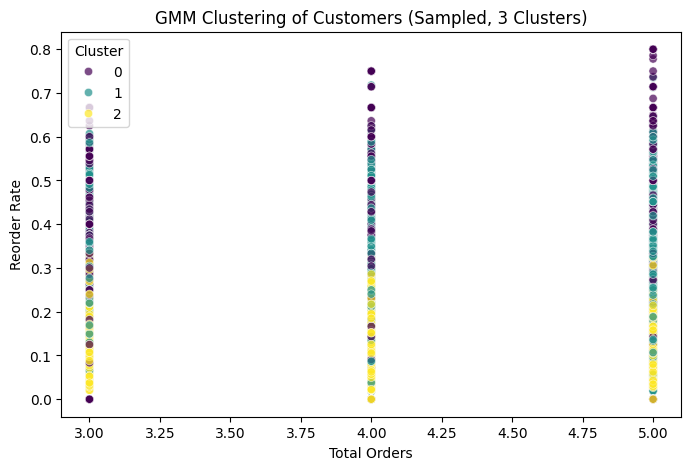

Silhouette Score: 0.1817


order_id  user_id eval_set  order_number  order_dow  \
199872    227527   111771    prior             3          1   
361007   3154151   201620    prior             3          6   
216729   2849972   121239    train             4          4   
245030   1740196   136971    prior             3          4   
277705    937838   155125    prior             3          6   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
199872                 13                    30.0             4           10   
361007                  7                    30.0             3           17   
216729                 12                    30.0             3           39   
245030                  9                    30.0             3           63   
277705                 14                    30.0             4           12   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
199872               3         22.500000             2.500000      0.300000   
361007               3          9.941176             5.666667      0.176471   
216729               7         22.846154            13.000000      0.179487   
245030              15         15.238095            21.000000      0.238095   
277705               2         22.250000             3.000000      0.166667   

        cluster  
199872        0  
361007        2  
216729        2  
245030        1  
277705        0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 3~5회인 고객 필터링
filtered_df = df[df['total_orders'].between(3, 5)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택
features = ['total_orders', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수를 3로 설정하여 GMM 적용
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
sampled_df['cluster'] = gmm.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()
print("GMM Cluster Counts:")
print(cluster_counts)

# 클러스터링 결과 시각화 (주문 건수 vs 재구매율)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_orders'], y=sampled_df['reorder_rate'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Orders")
plt.ylabel("Reorder Rate")
plt.title("GMM Clustering of Customers (Sampled, 3 Clusters)")
plt.legend(title="Cluster")
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, sampled_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 클러스터링된 데이터 확인
sampled_df.head()

Silhouette Score: 0.1817 으로 안좋음

features =

['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']

         order_dow  order_hour_of_day  total_items  total_reorders  \
cluster                                                              
0         0.896125          13.647250    61.317390       21.973764   
1         4.556199          13.562217    59.424549       21.178027   
2         2.615322          13.644193   211.152619      113.969901   

         avg_days_between  avg_items_per_order  reorder_rate  
cluster                                                       
0               17.332702             8.270964      0.338160  
1               17.282502             7.855062      0.336025  
2               16.403434            16.793880      0.532516  


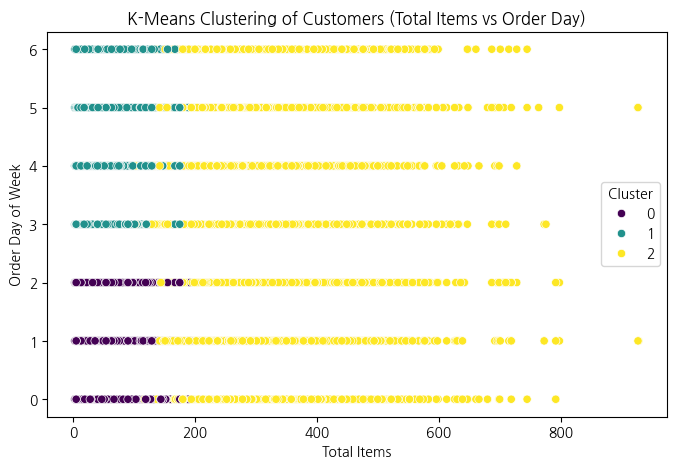

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2550362        1    prior            10          4                  8   
1   1402090        2    prior            11          1                 10   
2   3268552        2    prior            13          4                 11   
3   1492625        2    train            15          1                 11   
4    329954        4     test             6          3                 12   

   days_since_prior_order  total_orders  total_items  total_reorders  \
0                    30.0            10           59              41   
1                    30.0            14          195              93   
2                    30.0            14          195              93   
3                    30.0            14          195              93   
4                    30.0             5           18               1   

   avg_days_between  avg_items_per_order  reorder_rate  cluster  
0         18.457627             5.900000      0.694915        1  
1         14.835897            13.928571      0.476923        2  
2         14.835897            13.928571      0.476923        2  
3         14.835897            13.928571      0.476923        2  
4         11.722222             3.600000      0.055556        1

In [29]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# 클러스터별 고객 특성 평균값 확인
cluster_summary = filtered_df.groupby('cluster')[features].mean()
print(cluster_summary)  # Google Colab에서는 데이터 직접 출력

# 클러스터링 결과 시각화 (total_items vs order_dow)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_df['total_items'], y=filtered_df['order_dow'], hue=filtered_df['cluster'], palette='viridis')
plt.xlabel("Total Items")
plt.ylabel("Order Day of Week")
plt.title("K-Means Clustering of Customers (Total Items vs Order Day)")
plt.legend(title="Cluster")
plt.show()

# 클러스터링된 데이터 확인
filtered_df.head()

# K-Means 클러스터링 Cluster 0 (소량 주중 구매 고객)

**소량 주문을 하는 고객이므로 소량 구매 고객을 위한 프로모션(무료 배송, 소량 구매 할인 등) 적용 가능.**

**주 초반(월~수)에 주문하는 경향이 있으므로 이 기간에 특화된 광고 집행 추천.**

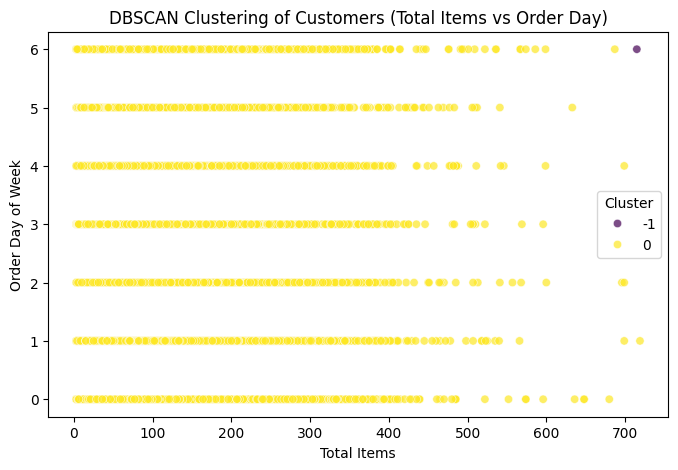

DBSCAN Cluster Counts (Sampled Data):
cluster
 0    31935
-1        1
Name: count, dtype: int64


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        0  
31331         0  
22127         0  
245320        0  
16333         0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택 (RAM 절약을 위해 일부 특징만 사용)
features = ['order_dow', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN 클러스터링 적용 (메모리 최적화)
dbscan = DBSCAN(eps=1.5, min_samples=5, n_jobs=-1)  # min_samples 줄임
sampled_df['cluster'] = dbscan.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()

# 클러스터링 결과 시각화 (total_items vs order_dow)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_items'], y=sampled_df['order_dow'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Items")
plt.ylabel("Order Day of Week")
plt.title("DBSCAN Clustering of Customers (Total Items vs Order Day)")
plt.legend(title="Cluster")
plt.show()

# 클러스터별 고객 수 출력
print("DBSCAN Cluster Counts (Sampled Data):")
print(cluster_counts)

# 클러스터링된 데이터 확인
sampled_df.head()

DBSCAN 분석시 의미 미약

**GMM 으로 분석**

GMM Cluster Counts:
cluster
2    12177
1    10912
0     8847
Name: count, dtype: int64


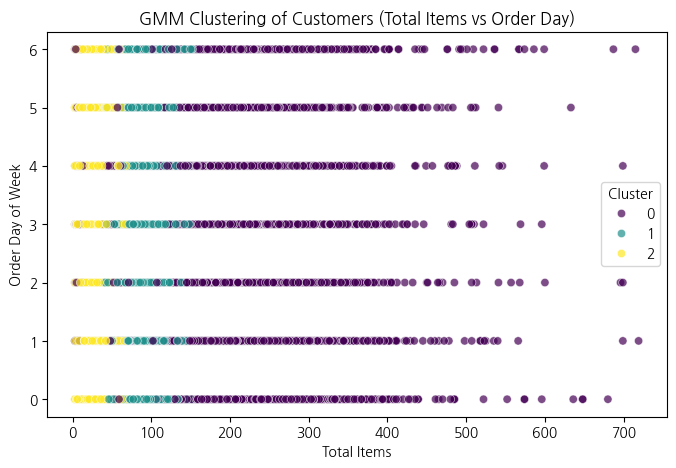

Silhouette Score: 0.1247


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        0  
31331         0  
22127         2  
245320        1  
16333         1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택
features = ['order_dow', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수를 3로 설정하여 GMM 적용
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
sampled_df['cluster'] = gmm.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()
print("GMM Cluster Counts:")
print(cluster_counts)

# 클러스터링 결과 시각화 (total_items vs order_dow)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_items'], y=sampled_df['order_dow'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Items")
plt.ylabel("Order Day of Week")
plt.title("GMM Clustering of Customers (Total Items vs Order Day)")
plt.legend(title="Cluster")
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, sampled_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 클러스터링된 데이터 확인
sampled_df.head()

GMM Cluster Counts:
cluster
1    19336
0    12600
Name: count, dtype: int64


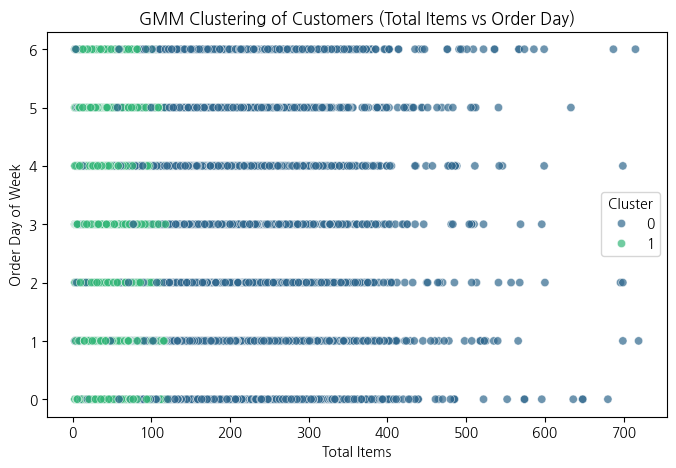

Silhouette Score: 0.3046


order_id  user_id eval_set  order_number  order_dow  \
308084   3157110   172089    prior            11          6   
31331    2956449    17611    prior            17          0   
22127    2287823    12532    prior             2          0   
245320   1277522   137129    prior             4          5   
16333      11074     9266    prior             7          5   

        order_hour_of_day  days_since_prior_order  total_orders  total_items  \
308084                 15                    30.0            13          222   
31331                   8                    30.0            17          148   
22127                  11                    30.0             3            9   
245320                 17                    30.0             9           94   
16333                  14                    30.0             7          116   

        total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
308084              77         14.779279            17.076923      0.346847   
31331              101         12.500000             8.705882      0.682432   
22127                1         12.777778             3.000000      0.111111   
245320              13         17.127660            10.444444      0.138298   
16333               34         19.103448            16.571429      0.293103   

        cluster  
308084        0  
31331         0  
22127         1  
245320        1  
16333         1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()

# 랜덤 샘플링 (10% 데이터만 사용)
sample_fraction = 0.1  # 샘플링 비율을 10%로 줄임
sampled_df = filtered_df.sample(frac=sample_fraction, random_state=42).copy()

# 필요한 특성 선택
features = ['order_dow', 'total_items', 'total_reorders', 'reorder_rate']
X = sampled_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 클러스터 개수를 2로 설정하여 GMM 적용
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
sampled_df['cluster'] = gmm.fit_predict(X_scaled)

# 클러스터별 고객 수 확인
cluster_counts = sampled_df['cluster'].value_counts()
print("GMM Cluster Counts:")
print(cluster_counts)

# 클러스터링 결과 시각화 (total_items vs order_dow)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sampled_df['total_items'], y=sampled_df['order_dow'], hue=sampled_df['cluster'], palette='viridis', alpha=0.7)
plt.xlabel("Total Items")
plt.ylabel("Order Day of Week")
plt.title("GMM Clustering of Customers (Total Items vs Order Day)")
plt.legend(title="Cluster")
plt.show()

# 실루엣 점수 계산
silhouette_avg = silhouette_score(X_scaled, sampled_df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

# 클러스터링된 데이터 확인
sampled_df.head()

고객과 제품명과의 관계파악위해

order_products_prior_df와 products_df 데이터를 조인하여

product_name 컬럼을 추가하는 작

In [ ]:
import pandas as pd

# 파일 로드
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"
order_products_path = "/content/drive/MyDrive/data/MQ05/order_products__prior.csv"
products_path = "/content/drive/MyDrive/data/MQ05/products.csv"

# 데이터 불러오기
df = pd.read_csv(file_path)
order_products_prior_df = pd.read_csv(order_products_path)
products_df = pd.read_csv(products_path)

# order_id를 기준으로 order_products_prior_df와 병합
merged_df = df.merge(order_products_prior_df[['order_id', 'product_id']], on='order_id', how='left')

# product_id를 기준으로 products_df와 병합하여 product_name 추가
merged_df = merged_df.merge(products_df[['product_id', 'product_name']], on='product_id', how='left')

# 결과 확인
print(merged_df.head())

# 새로운 데이터셋 저장 (필요할 경우 주석 해제)
merged_df.to_csv("/content/drive/MyDrive/data/MQ05/30custome_with_products.csv", index=False)

   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2550362        1    prior            10          4                  8   
1   2550362        1    prior            10          4                  8   
2   2550362        1    prior            10          4                  8   
3   2550362        1    prior            10          4                  8   
4   2550362        1    prior            10          4                  8   

   days_since_prior_order  total_orders  total_items  total_reorders  \
0                    30.0            10           59              41   
1                    30.0            10           59              41   
2                    30.0            10           59              41   
3                    30.0            10           59              41   
4                    30.0            10           59              41   

   avg_days_between  avg_items_per_order  reorder_rate  product_id  \
0         18.457627               

In [ ]:
import pandas as pd

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/30custome_with_products.csv"

# CSV 파일 불러오기
try:
    df = pd.read_csv(file_path)
    # 데이터 테이블 형태로 출력
    from IPython.display import display
    display(df)
except FileNotFoundError:
    print(f"Error: 파일을 찾을 수 없습니다 - {file_path}")

order_id  user_id eval_set  order_number  order_dow  \
0         2550362        1    prior            10          4   
1         2550362        1    prior            10          4   
2         2550362        1    prior            10          4   
3         2550362        1    prior            10          4   
4         2550362        1    prior            10          4   
...           ...      ...      ...           ...        ...   
3133238   1854736   206209    prior            11          4   
3133239   1854736   206209    prior            11          4   
3133240   1854736   206209    prior            11          4   
3133241   1854736   206209    prior            11          4   
3133242    272231   206209    train            14          6   

         order_hour_of_day  days_since_prior_order  total_orders  total_items  \
0                        8                    30.0            10           59   
1                        8                    30.0            10           59   
2                        8                    30.0            10           59   
3                        8                    30.0            10           59   
4                        8                    30.0            10           59   
...                    ...                     ...           ...          ...   
3133238                 10                    30.0            13          129   
3133239                 10                    30.0            13          129   
3133240                 10                    30.0            13          129   
3133241                 10                    30.0            13          129   
3133242                 14                    30.0            13          129   

         total_reorders  avg_days_between  avg_items_per_order  reorder_rate  \
0                    41         18.457627             5.900000      0.694915   
1                    41         18.457627             5.900000      0.694915   
2                    41         18.457627             5.900000      0.694915   
3                    41         18.457627             5.900000      0.694915   
4                    41         18.457627             5.900000      0.694915   
...                 ...               ...                  ...           ...   
3133238              61         18.131783             9.923077      0.472868   
3133239              61         18.131783             9.923077      0.472868   
3133240              61         18.131783             9.923077      0.472868   
3133241              61         18.131783             9.923077      0.472868   
3133242              61         18.131783             9.923077      0.472868   

         product_id                             product_name  
0             196.0                                     Soda  
1           46149.0                        Zero Calorie Cola  
2           39657.0                   Milk Chocolate Almonds  
3           38928.0                 0% Greek Strained Yogurt  
4           25133.0                    Organic String Cheese  
...             ...                                      ...  
3133238     19348.0                            Fat Free Milk  
3133239     15700.0  Cheddar Cheese Nut Thins Cracker Snacks  
3133240     40310.0               Oven Roasted Turkey Breast  
3133241     48370.0                   Sensitive Toilet Paper  
3133242         NaN                                      NaN  

[3133243 rows x 15 columns]

Maximum Total Orders: 99
Unique Users: 152012
Unique Products: 43698


<ipython-input-15-7793d78bee13>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Unique Users', 'Unique Products'], y=[unique_users, unique_products], palette='viridis')


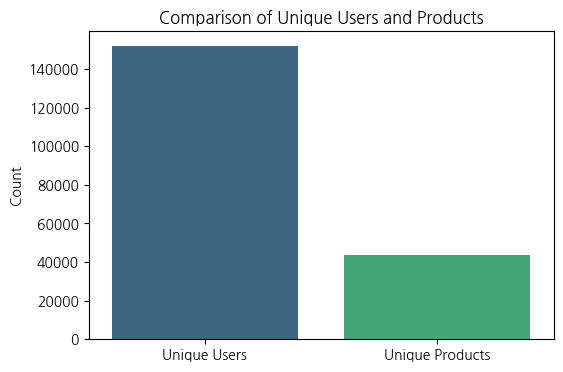

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/30custome_with_products.csv"

# CSV 파일 불러오기
try:
    df = pd.read_csv(file_path)

    # total_orders의 최대값 확인
    max_total_orders = df['total_orders'].max()
    print(f"Maximum Total Orders: {max_total_orders}")

    # user_id와 product_id의 고유 개수 비교
    unique_users = df['user_id'].nunique()
    unique_products = df['product_id'].nunique()
    print(f"Unique Users: {unique_users}")
    print(f"Unique Products: {unique_products}")

    # 데이터 시각화
    plt.figure(figsize=(6, 4))
    sns.barplot(x=['Unique Users', 'Unique Products'], y=[unique_users, unique_products], palette='viridis')
    plt.ylabel("Count")
    plt.title("Comparison of Unique Users and Products")
    plt.show()

except FileNotFoundError:
    print(f"Error: 파일을 찾을 수 없습니다 - {file_path}")


Users수를 선별할수있으면 특정 제품이 무엇인지 알수 있을거 같다.

         order_dow  order_hour_of_day  total_items  total_reorders  \
cluster                                                              
0         0.896125          13.647250    61.317390       21.973764   
1         4.556199          13.562217    59.424549       21.178027   
2         2.615322          13.644193   211.152619      113.969901   

         avg_days_between  avg_items_per_order  reorder_rate  
cluster                                                       
0               17.332702             8.270964      0.338160  
1               17.282502             7.855062      0.336025  
2               16.403434            16.793880      0.532516  


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


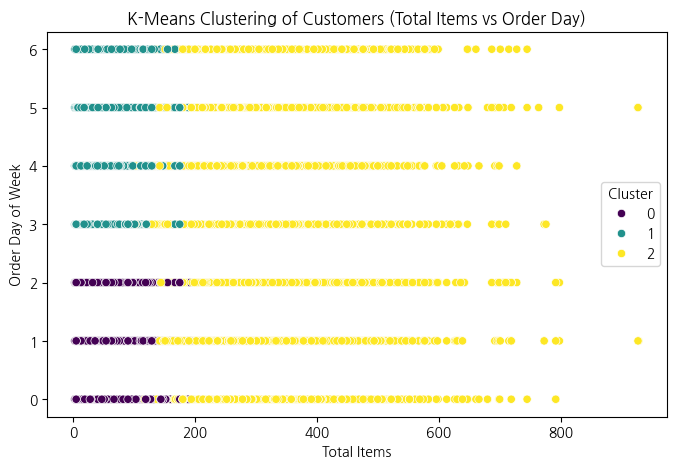

order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2550362        1    prior            10          4                  8   
1   1402090        2    prior            11          1                 10   
2   3268552        2    prior            13          4                 11   
3   1492625        2    train            15          1                 11   
4    329954        4     test             6          3                 12   

   days_since_prior_order  total_orders  total_items  total_reorders  \
0                    30.0            10           59              41   
1                    30.0            14          195              93   
2                    30.0            14          195              93   
3                    30.0            14          195              93   
4                    30.0             5           18               1   

   avg_days_between  avg_items_per_order  reorder_rate  cluster  
0         18.457627             5.900000      0.694915        1  
1         14.835897            13.928571      0.476923        2  
2         14.835897            13.928571      0.476923        2  
3         14.835897            13.928571      0.476923        2  
4         11.722222             3.600000      0.055556        1

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# 클러스터별 고객 특성 평균값 확인
cluster_summary = filtered_df.groupby('cluster')[features].mean()
print(cluster_summary)  # Google Colab에서는 데이터 직접 출력

# 클러스터링 결과 시각화 (total_items vs order_dow)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_df['total_items'], y=filtered_df['order_dow'], hue=filtered_df['cluster'], palette='viridis')
plt.xlabel("Total Items")
plt.ylabel("Order Day of Week")
plt.title("K-Means Clustering of Customers (Total Items vs Order Day)")
plt.legend(title="Cluster")
plt.show()

# 클러스터링된 데이터 확인
filtered_df.head()

클러스터0인고객의 월~수에 주문수가 적은 군집

이들에 해당하는 UserID별 제품명

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/30custome.csv"

# 데이터 로드
df = pd.read_csv(file_path)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df[df['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# 클러스터별 고객 특성 평균값 확인
cluster_summary = filtered_df.groupby('cluster')[features].mean()
print(cluster_summary)  # Google Colab에서는 데이터 직접 출력

# Cluster 0에 해당하는 user_id 값 출력
cluster_0_user_ids = filtered_df[filtered_df['cluster'] == 0]['user_id'].unique()
print("User IDs in Cluster 0:")
print(cluster_0_user_ids)

         order_dow  order_hour_of_day  total_items  total_reorders  \
cluster                                                              
0         0.896125          13.647250    61.317390       21.973764   
1         4.556199          13.562217    59.424549       21.178027   
2         2.615322          13.644193   211.152619      113.969901   

         avg_days_between  avg_items_per_order  reorder_rate  
cluster                                                       
0               17.332702             8.270964      0.338160  
1               17.282502             7.855062      0.336025  
2               16.403434            16.793880      0.532516  
User IDs in Cluster 0:
[     8     12     16 ... 206203 206205 206209]


Top Selling Products by Cluster 0 Users (Top 5%):
product_name
Banana                                  19222
Bag of Organic Bananas                  13109
Organic Baby Spinach                    10405
Organic Strawberries                     8604
Organic Avocado                          7825
                                        ...  
Pistachios                                134
Gluten Free Millet-Chia Bread             134
Spinach and Arugula Salad                 134
House Blend Deep Roast Ground Coffee      134
Red Plastic Cups                          134
Name: count, Length: 1927, dtype: int64


<ipython-input-31-b7f55ee10194>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_sell.values, y=Top_sell.index, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


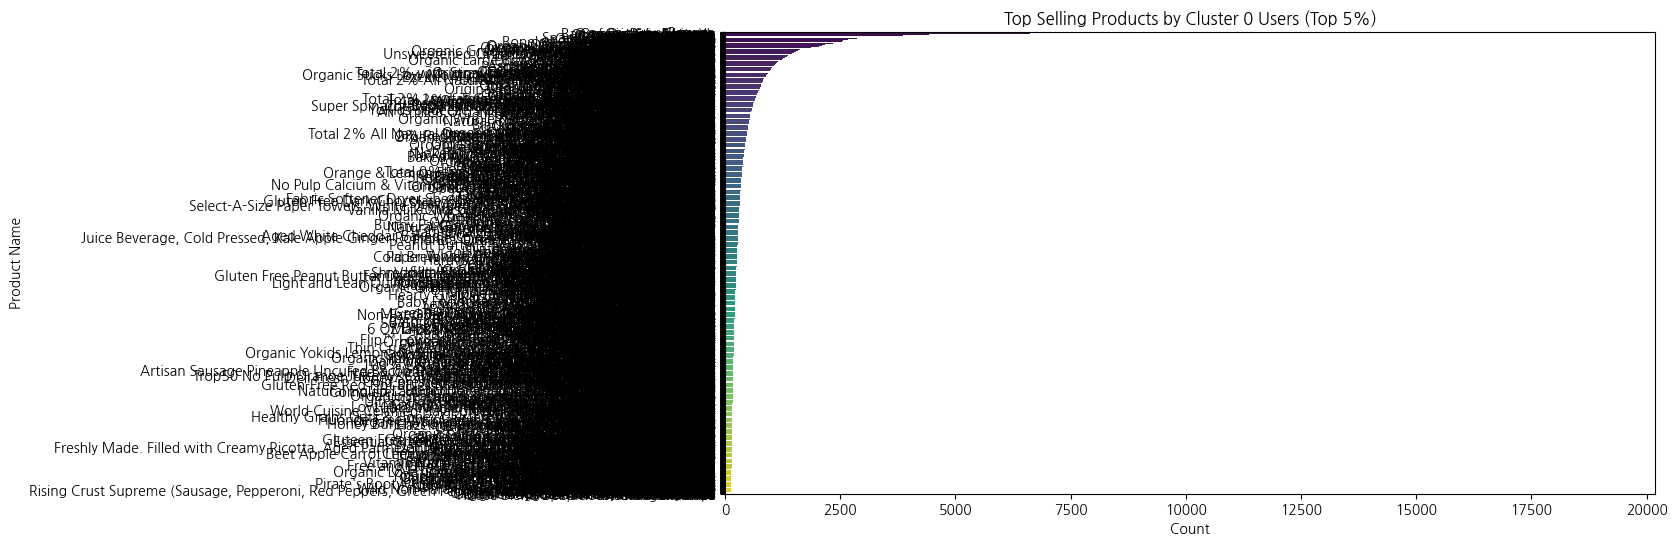

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path_1 = "/content/drive/MyDrive/data/MQ05/30custome.csv"
file_path_2 = "/content/drive/MyDrive/data/MQ05/30custome_with_products.csv"

# 데이터 로드
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df1[df1['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# Cluster 0에 해당하는 user_id 값 추출
cluster_0_user_ids = filtered_df[filtered_df['cluster'] == 0]['user_id'].unique()

# Cluster 0의 user_id에 해당하는 제품명 찾기
filtered_products = df2[df2['user_id'].isin(cluster_0_user_ids)][['user_id', 'product_name']]

# 제품명별 등장 횟수 계산 및 정렬
product_counts = filtered_products['product_name'].value_counts()

# 상위 5% 제품 선택
top_5_percent_threshold = product_counts.quantile(0.95)
Top_sell = product_counts[product_counts >= top_5_percent_threshold]

# 결과 출력
print("Top Selling Products by Cluster 0 Users (Top 5%):")
print(Top_sell)

# 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_sell.values, y=Top_sell.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.title("Top Selling Products by Cluster 0 Users (Top 5%)")
plt.show()

Top Selling Products by Cluster 0 Users (Top 1%):
product_name
Banana                                 19222
Bag of Organic Bananas                 13109
Organic Baby Spinach                   10405
Organic Strawberries                    8604
Organic Avocado                         7825
                                       ...  
Blackberry Cucumber Sparkling Water      514
Red Potatoes                             513
Mild Salsa                               513
Raw Shrimp                               513
Organic 21 Grain Thin Sliced Bread       512
Name: count, Length: 385, dtype: int64


<ipython-input-32-fd6f4acef0e1>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_sell.values, y=Top_sell.index, palette='viridis')


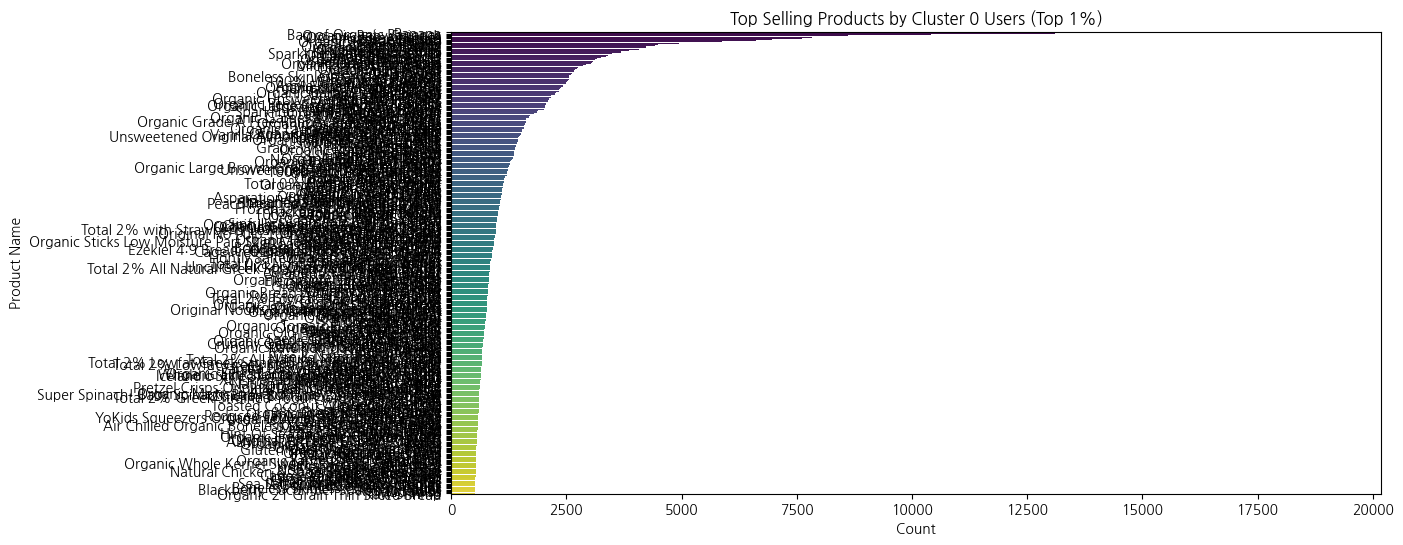

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path_1 = "/content/drive/MyDrive/data/MQ05/30custome.csv"
file_path_2 = "/content/drive/MyDrive/data/MQ05/30custome_with_products.csv"

# 데이터 로드
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df1[df1['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# Cluster 0에 해당하는 user_id 값 추출
cluster_0_user_ids = filtered_df[filtered_df['cluster'] == 0]['user_id'].unique()

# Cluster 0의 user_id에 해당하는 제품명 찾기
filtered_products = df2[df2['user_id'].isin(cluster_0_user_ids)][['user_id', 'product_name']]

# 제품명별 등장 횟수 계산 및 정렬
product_counts = filtered_products['product_name'].value_counts()

# 상위 1% 제품 선택
top_1_percent_threshold = product_counts.quantile(0.99)
Top_sell = product_counts[product_counts >= top_1_percent_threshold]

# 결과 출력
print("Top Selling Products by Cluster 0 Users (Top 1%):")
print(Top_sell)

# 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_sell.values, y=Top_sell.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.title("Top Selling Products by Cluster 0 Users (Top 1%)")
plt.show()

Top Selling Products by Cluster 0 Users (Top 1%미만):
product_name
Banana                                 19222
Bag of Organic Bananas                 13109
Organic Baby Spinach                   10405
Organic Strawberries                    8604
Organic Avocado                         7825
                                       ...  
Blackberry Cucumber Sparkling Water      514
Red Potatoes                             513
Mild Salsa                               513
Raw Shrimp                               513
Organic 21 Grain Thin Sliced Bread       512
Name: count, Length: 385, dtype: int64


<ipython-input-35-9e6f787da516>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_sell.values, y=Top_sell.index, palette='viridis')


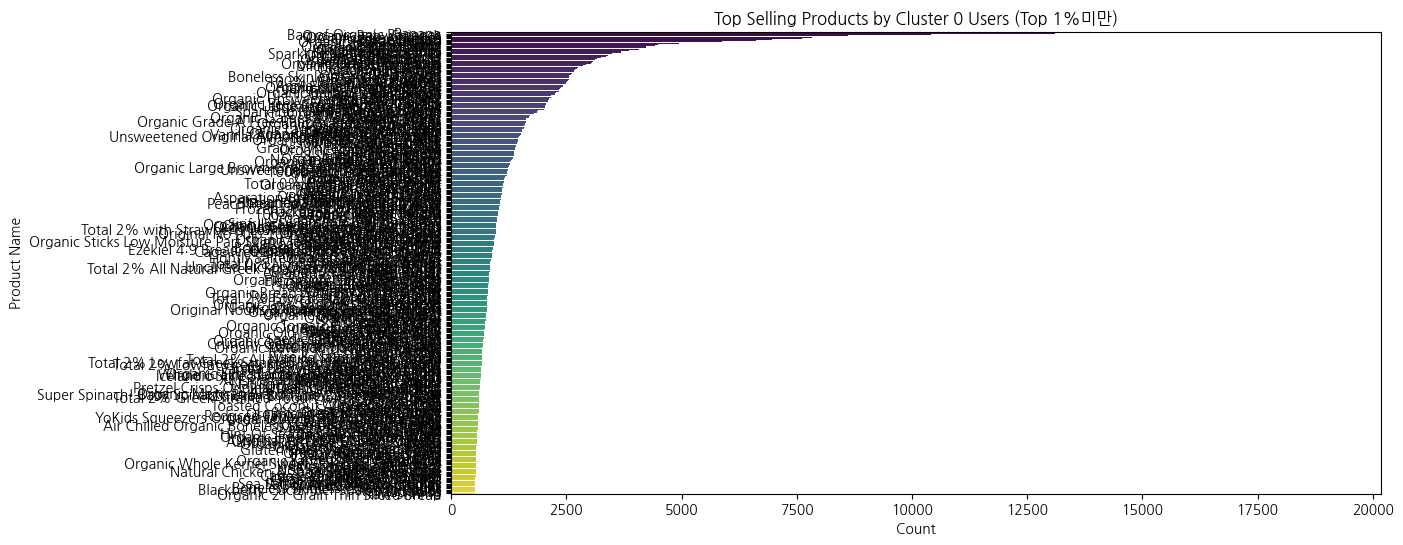

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path_1 = "/content/drive/MyDrive/data/MQ05/30custome.csv"
file_path_2 = "/content/drive/MyDrive/data/MQ05/30custome_with_products.csv"

# 데이터 로드
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df1[df1['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# Cluster 0에 해당하는 user_id 값 추출
cluster_0_user_ids = filtered_df[filtered_df['cluster'] == 0]['user_id'].unique()

# Cluster 0의 user_id에 해당하는 제품명 찾기
filtered_products = df2[df2['user_id'].isin(cluster_0_user_ids)][['user_id', 'product_name']]

# 제품명별 등장 횟수 계산 및 정렬
product_counts = filtered_products['product_name'].value_counts()

# 상위 1%미만 제품 선택
top_small_percent_threshold = product_counts.quantile(0.99)
Top_sell = product_counts[product_counts >= top_small_percent_threshold]

# 결과 출력
print("Top Selling Products by Cluster 0 Users (Top 1%미만):")
print(Top_sell)

# 그래프 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_sell.values, y=Top_sell.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.title("Top Selling Products by Cluster 0 Users (Top 1%미만)")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 파일 경로
file_path_1 = "/content/drive/MyDrive/data/MQ05/30custome.csv"
file_path_2 = "/content/drive/MyDrive/data/MQ05/30custome_with_products.csv"

# 데이터 로드
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Total Orders가 1~20회인 고객 필터링
filtered_df = df1[df1['total_orders'].between(1, 20)].copy()  # .copy() 추가하여 경고 방지

# 필요한 특성 선택
features = ['order_dow', 'order_hour_of_day', 'total_items', 'total_reorders',
            'avg_days_between', 'avg_items_per_order', 'reorder_rate']
X = filtered_df[features]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 최적의 K 값 설정 및 K-means 클러스터링 적용
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
filtered_df.loc[:, 'cluster'] = kmeans.fit_predict(X_scaled)  # .loc 사용하여 경고 해결

# Cluster 0에 해당하는 user_id 값 추출
cluster_0_user_ids = filtered_df[filtered_df['cluster'] == 0]['user_id'].unique()

# Cluster 0의 user_id에 해당하는 제품명 찾기
filtered_products = df2[df2['user_id'].isin(cluster_0_user_ids)][['user_id', 'product_name']]

# 제품명별 등장 횟수 계산 및 정렬
product_counts = filtered_products['product_name'].value_counts()

# 상위 1% 미만 제품 선택
top_small_percent_threshold = product_counts.quantile(0.99)
Top_sell = product_counts[product_counts >= top_small_percent_threshold]

# Top Selling 데이터프레임 생성
Top_Selling = Top_sell.reset_index().rename(columns={'index': 'product_name', 0: 'sales_count'})

# 결과 출력
Top_Selling.to_csv("/content/drive/MyDrive/data/MQ05/Top_Selling_of_30over.csv", index=False)
print("Top Selling Products by Cluster 0 Users (Top 1%미만):")
print(Top_Selling)

Top Selling Products by Cluster 0 Users (Top 1%미만):
                            product_name  count
0                                 Banana  19222
1                 Bag of Organic Bananas  13109
2                   Organic Baby Spinach  10405
3                   Organic Strawberries   8604
4                        Organic Avocado   7825
..                                   ...    ...
380  Blackberry Cucumber Sparkling Water    514
381                         Red Potatoes    513
382                           Mild Salsa    513
383                           Raw Shrimp    513
384   Organic 21 Grain Thin Sliced Bread    512

[385 rows x 2 columns]


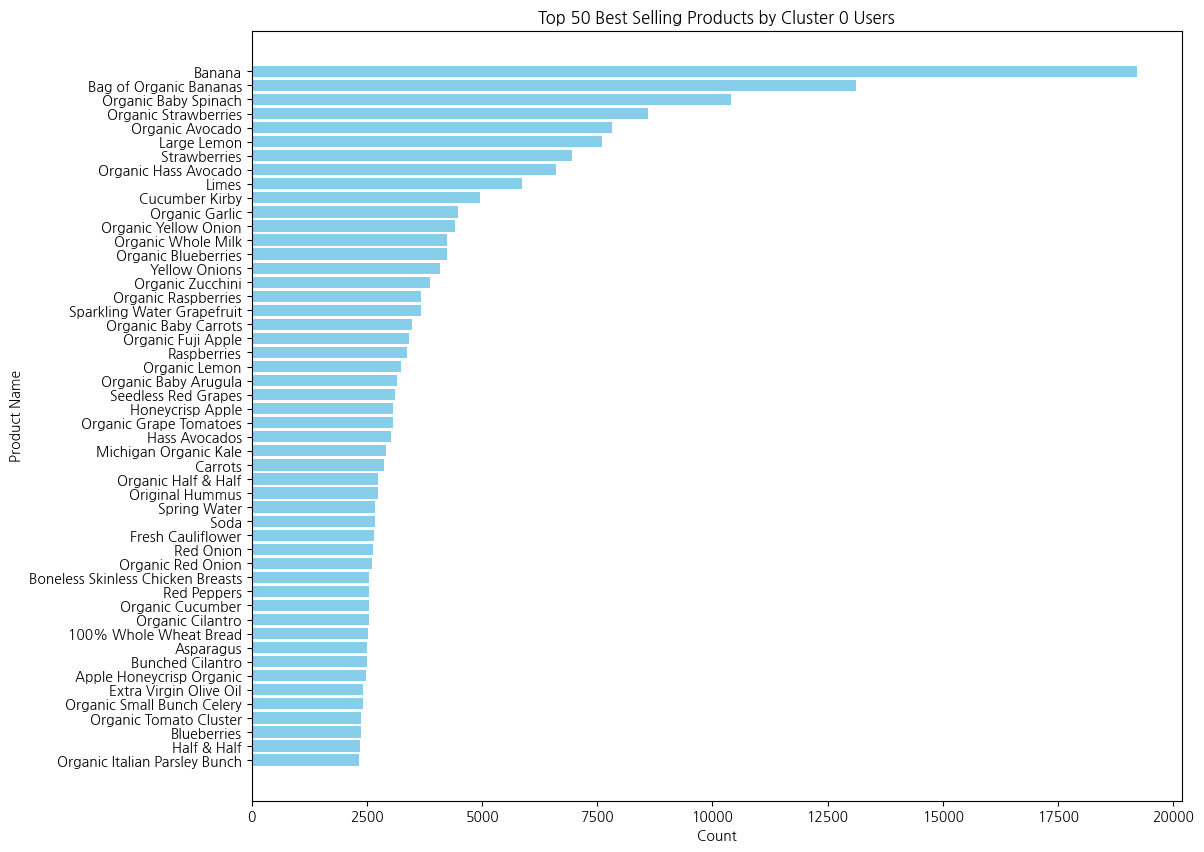

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/Top_Selling_of_30over.csv"

# CSV 파일 로드
df = pd.read_csv(file_path)

# 컬럼명 확인 및 공백 제거
df.columns = df.columns.str.strip()

# 컬럼명 확인 후 적절한 값으로 변경
if 'product_name' not in df.columns or 'count' not in df.columns:
    print("Available columns:", df.columns)
    raise ValueError("Column names might be incorrect. Please check the printed column list.")

# count 기준 상위 50개 제품 선택
df_sorted = df.sort_values(by='count', ascending=False).head(50)

# 막대그래프 시각화 (가로형)
plt.figure(figsize=(12, 10))
plt.barh(df_sorted['product_name'], df_sorted['count'], color='skyblue')

# 라벨 설정
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.title("Top 50 Best Selling Products by Cluster 0 Users")

# y축을 내림차순 정렬 (큰 값이 위쪽에 오도록)
plt.gca().invert_yaxis()

# 그래프 표시
plt.show()

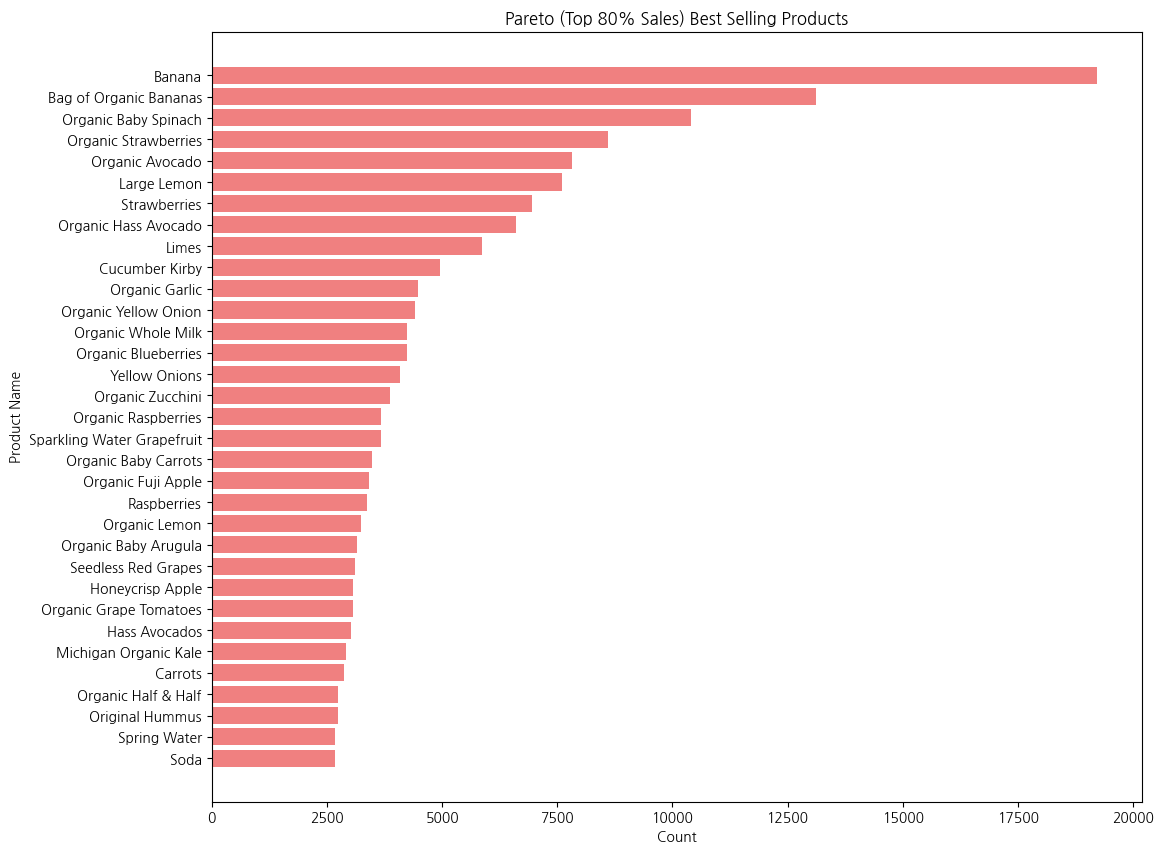

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/Top_Selling_of_30over.csv"

# CSV 파일 로드
df = pd.read_csv(file_path)

# 컬럼명 확인 및 공백 제거
df.columns = df.columns.str.strip()

# 컬럼명 확인 후 적절한 값으로 변경
if 'product_name' not in df.columns or 'count' not in df.columns:
    print("Available columns:", df.columns)
    raise ValueError("Column names might be incorrect. Please check the printed column list.")

# count 기준 상위 50개 제품 선택
df_sorted = df.sort_values(by='count', ascending=False).head(50)

# 총 판매량 계산
total_sales = df_sorted['count'].sum()

# 누적 판매량 계산 및 80% 기준 찾기
df_sorted['cumulative_sum'] = df_sorted['count'].cumsum()
df_sorted['cumulative_percentage'] = df_sorted['cumulative_sum'] / total_sales * 100

# 파레토 기준(80%)을 충족하는 제품 필터링
pareto_threshold = 80
df_pareto = df_sorted[df_sorted['cumulative_percentage'] <= pareto_threshold]

# 그래프 시각화 (가로 막대 그래프)
plt.figure(figsize=(12, 10))
plt.barh(df_pareto['product_name'], df_pareto['count'], color='lightcoral')  # 파레토 기준 충족 제품 강조

# 라벨 설정
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.title("Pareto (Top 80% Sales) Best Selling Products")

# y축을 내림차순 정렬 (큰 값이 위쪽에 오도록)
plt.gca().invert_yaxis()

# 그래프 표시
plt.show()

<ipython-input-50-0da06d84c8b4>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pareto['is_organic'] = df_pareto['product_name'].str.contains("Organic", case=False, na=False)


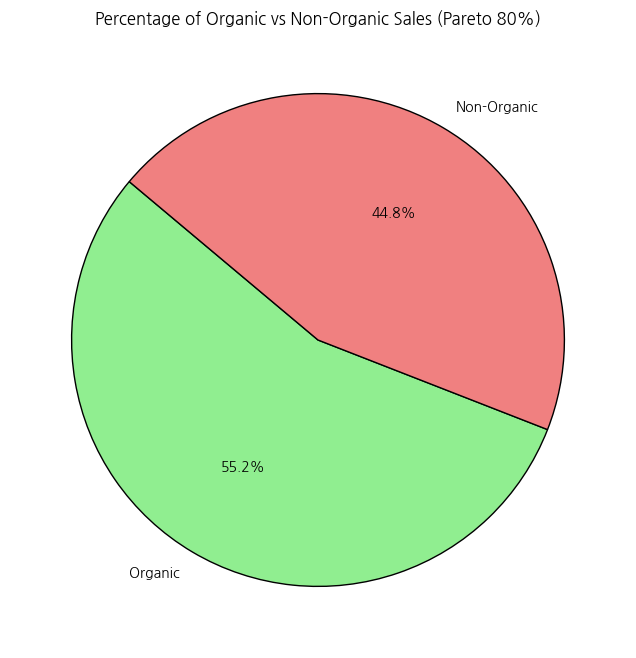

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/Top_Selling_of_30over.csv"

# CSV 파일 로드
df = pd.read_csv(file_path)

# 컬럼명 확인 및 공백 제거
df.columns = df.columns.str.strip()

# 컬럼명 확인 후 적절한 값으로 변경
if 'product_name' not in df.columns or 'count' not in df.columns:
    print("Available columns:", df.columns)
    raise ValueError("Column names might be incorrect. Please check the printed column list.")

# count 기준 상위 50개 제품 선택
df_sorted = df.sort_values(by='count', ascending=False).head(50)

# 총 판매량 계산
total_sales = df_sorted['count'].sum()

# 누적 판매량 계산 및 80% 기준 찾기
df_sorted['cumulative_sum'] = df_sorted['count'].cumsum()
df_sorted['cumulative_percentage'] = df_sorted['cumulative_sum'] / total_sales * 100

# 파레토 기준(80%)을 충족하는 제품 필터링
pareto_threshold = 80
df_pareto = df_sorted[df_sorted['cumulative_percentage'] <= pareto_threshold]

# "Organic" 포함 여부에 따라 그룹 분류
df_pareto['is_organic'] = df_pareto['product_name'].str.contains("Organic", case=False, na=False)
organic_total = df_pareto[df_pareto['is_organic'] == True]['count'].sum()
non_organic_total = df_pareto[df_pareto['is_organic'] == False]['count'].sum()

# 원그래프(파이 차트) 시각화
labels = ["Organic", "Non-Organic"]
sizes = [organic_total, non_organic_total]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# 타이틀 추가
plt.title("Percentage of Organic vs Non-Organic Sales (Pareto 80%)")

# 그래프 표시
plt.show()

In [ ]:
import pandas as pd

# 파일 경로
file_path = "/content/drive/MyDrive/data/MQ05/Top_Selling_of_30over.csv"

# CSV 파일 로드
df = pd.read_csv(file_path)

# 컬럼명 확인 및 공백 제거
df.columns = df.columns.str.strip()

# 컬럼명 확인 후 적절한 값으로 변경
if 'product_name' not in df.columns or 'count' not in df.columns:
    print("Available columns:", df.columns)
    raise ValueError("Column names might be incorrect. Please check the printed column list.")

# count 기준 상위 50개 제품 선택
df_sorted = df.sort_values(by='count', ascending=False).head(50)

# 총 판매량 계산
total_sales = df_sorted['count'].sum()

# 누적 판매량 계산 및 80% 기준 찾기
df_sorted['cumulative_sum'] = df_sorted['count'].cumsum()
df_sorted['cumulative_percentage'] = df_sorted['cumulative_sum'] / total_sales * 100

# 파레토 기준(80%)을 충족하는 제품 필터링
pareto_threshold = 80
df_pareto = df_sorted[df_sorted['cumulative_percentage'] <= pareto_threshold]

# "Organic"이 포함된 product_name 필터링
df_organic = df_pareto[df_pareto['product_name'].str.contains("Organic", case=False, na=False)]


# 번호(no) 컬럼 다시 추가하여 원하는 형태로 정리
df_organic_cleaned = df_organic[['product_name', 'count']].copy()
df_organic_cleaned.insert(0, 'No', range(1, len(df_organic_cleaned) + 1))

# 테이블 형태로 출력
print("Organic 제품 리스트:")
display(df_organic_cleaned)

Organic 제품 리스트:


No            product_name  count
1    1  Bag of Organic Bananas  13109
2    2    Organic Baby Spinach  10405
3    3    Organic Strawberries   8604
4    4         Organic Avocado   7825
7    5    Organic Hass Avocado   6614
10   6          Organic Garlic   4484
11   7    Organic Yellow Onion   4417
12   8      Organic Whole Milk   4235
13   9     Organic Blueberries   4232
15  10        Organic Zucchini   3867
16  11     Organic Raspberries   3686
18  12    Organic Baby Carrots   3482
19  13      Organic Fuji Apple   3413
21  14           Organic Lemon   3249
22  15    Organic Baby Arugula   3160
25  16  Organic Grape Tomatoes   3064
27  17   Michigan Organic Kale   2923
29  18     Organic Half & Half   2751

# **상위 29개 제품중 유기농18에 제품에 대한 특별관리해서 30일이상 간격으로 주문하는 고객을 대상으로 마케팅 전략필요 하면 ROI이 올라갈 것이다.**